In [1]:
import os
import tarfile
import gzip
import pandas as pd
import scanpy as sc
download_url = "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE180nnn/GSE180286/suppl/GSE180286_RAW.tar"
raw_dir = os.path.expanduser("~/Desktop/Capstone/Raw Data")
tar_path = os.path.join(raw_dir, "GSE180286_RAW.tar")

# Step 1: Download the file
import urllib.request
if not os.path.exists(tar_path):
    print("Downloading...")
    urllib.request.urlretrieve(download_url, tar_path)
    print("Download completed.")
else:
    print("File already exists.")

extracted_dir = os.path.join(raw_dir, "GSE180286_EXTRACTED")
os.makedirs(extracted_dir, exist_ok=True)

with tarfile.open(tar_path, "r") as tar:
    tar.extractall(path=extracted_dir)
    print("Extraction complete.")
files = sorted([f for f in os.listdir(extracted_dir) if f.endswith(".txt.gz")])
print("Available files:", files[:5])  # Show a few

# Choose one file
expr_file = os.path.join(extracted_dir, files[0])
print(f"Loading file: {expr_file}")
with gzip.open(expr_file, 'rt') as f:
    df = pd.read_csv(f, sep="\t", index_col=0)

adata3 = sc.AnnData(df.T)
adata3.var_names_make_unique()

File already exists.
Extraction complete.
Available files: ['GSM5457199_A2019-1.expression_matrix.txt.gz', 'GSM5457200_A2019-2.expression_matrix.txt.gz', 'GSM5457201_A2019-3.expression_matrix.txt.gz', 'GSM5457202_B2019-1.expression_matrix.txt.gz', 'GSM5457203_B2019-2.expression_matrix.txt.gz']
Loading file: /Users/adi/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457199_A2019-1.expression_matrix.txt.gz


In [2]:
adatas = []

for fname in files:
    path = os.path.join(extracted_dir, fname)
    print(f"Loading: {path}")
    
    with gzip.open(path, 'rt') as f:
        df = pd.read_csv(f, sep="\t", index_col=0)
    
    ad = sc.AnnData(df.T)
    ad.var_names_make_unique()
    
    # Add metadata: sample ID (e.g., GSM5457199)
    sample_id = fname.split("_")[0]
    ad.obs["sample"] = sample_id
    
    adatas.append(ad)

# Concatenate all into one AnnData object
adata3 = adatas[0].concatenate(
    adatas[1:], 
    batch_key="file", 
    batch_categories=[f.split("_")[0] for f in files]
)
print("✅ Combined adata3 shape:", adata3.shape)

Loading: /Users/adi/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457199_A2019-1.expression_matrix.txt.gz
Loading: /Users/adi/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457200_A2019-2.expression_matrix.txt.gz
Loading: /Users/adi/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457201_A2019-3.expression_matrix.txt.gz
Loading: /Users/adi/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457202_B2019-1.expression_matrix.txt.gz
Loading: /Users/adi/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457203_B2019-2.expression_matrix.txt.gz
Loading: /Users/adi/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457204_B2019-3.expression_matrix.txt.gz
Loading: /Users/adi/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457205_C2020-1.expression_matrix.txt.gz
Loading: /Users/adi/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457206_C2020-2.expression_matrix.txt.gz
Loading: /Users/adi/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457207_C2020-3.expression_matrix.txt.gz
Loading: /

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_13081/451958691.py:20: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata3 = adatas[0].concatenate(


✅ Combined adata3 shape: (117481, 17872)


In [3]:
print(adata3.obs.head())
adata3.obs['file'].value_counts()
adata3.obs['sample'].value_counts()

                             sample        file
GGATAAGGGTCA-GSM5457199  GSM5457199  GSM5457199
CCGTGCGTACTG-GSM5457199  GSM5457199  GSM5457199
AGGTAACCTACG-GSM5457199  GSM5457199  GSM5457199
CTGTATAACCTA-GSM5457199  GSM5457199  GSM5457199
AAACAGGTTTGA-GSM5457199  GSM5457199  GSM5457199


sample
GSM5457201    16661
GSM5457202    11467
GSM5457203    11356
GSM5457204    11323
GSM5457200     8607
GSM5457207     8517
GSM5457210     8228
GSM5457211     7521
GSM5457213     6398
GSM5457212     5673
GSM5457209     5298
GSM5457206     4940
GSM5457205     4161
GSM5457208     4064
GSM5457199     3267
Name: count, dtype: int64

In [4]:
import os

save_dir = os.path.expanduser("~/Desktop/Capstone/Notebook recent")
os.makedirs(save_dir, exist_ok=True)


In [5]:
adata3.write(os.path.join(save_dir, "adata3_GSE180286_raw_15July.h5ad"), compression="gzip")


#adata3.write("~/Desktop/Capstone/Notebook recent/adata3_GSE180286_raw_15July.h5ad", compression="gzip")




In [ ]:
## Start this notebook from here

import os
import scanpy as sc
import pandas as pd

# Step 1: Reload prediction CSV without setting index
csv_path = os.path.expanduser("~/Desktop/Capstone/Notebook recent/GSE180286_predictions_mito_16July.csv")
#csv_path = os.path.expanduser("~/Desktop/Capstone/Notebook recent/GSE180286_obs_features_new_16July.csv")
df_val = pd.read_csv(csv_path)

# Step 2: Inspect and fix cell ID column
# Assume the original cell ID is in a column called 'Unnamed: 0' (likely true from earlier)
df_val = df_val.rename(columns={"Unnamed: 0": "cell_id_full"})
df_val["cell_id_short"] = df_val["cell_id_full"].str.split("-").str[:2].str.join("-")
df_val = df_val.set_index("cell_id_short")

# Step 3: Load adata
adata_path = os.path.expanduser("~/Desktop/Capstone/Notebook recent/adata3_GSE180286_raw_15July.h5ad")
adata3 = sc.read(adata_path)
adata3.obs["cell_id_short"] = adata3.obs_names.str.split("-").str[:2].str.join("-")

# Step 4: Map prediction columns
cols_to_map = [col for col in df_val.columns if col not in {"cell_id_full", "cell_id_short"}]

for col in cols_to_map:
    adata3.obs[col] = adata3.obs["cell_id_short"].map(df_val[col])

# Step 5: Confirm mapping
for col in cols_to_map:
    print(f"Mapped column: {col}")
    print(adata3.obs[col].value_counts(dropna=False))

✅ Mapped column: Unnamed: 0.1
Unnamed: 0.1
0         1
78329     1
78327     1
78326     1
78325     1
         ..
39158     1
39157     1
39156     1
39155     1
117480    1
Name: count, Length: 117481, dtype: int64
✅ Mapped column: sample
sample
GSM5457201    16661
GSM5457202    11467
GSM5457203    11356
GSM5457204    11323
GSM5457200     8607
GSM5457207     8517
GSM5457210     8228
GSM5457211     7521
GSM5457213     6398
GSM5457212     5673
GSM5457209     5298
GSM5457206     4940
GSM5457205     4161
GSM5457208     4064
GSM5457199     3267
Name: count, dtype: int64
✅ Mapped column: file
file
GSM5457201    16661
GSM5457202    11467
GSM5457203    11356
GSM5457204    11323
GSM5457200     8607
GSM5457207     8517
GSM5457210     8228
GSM5457211     7521
GSM5457213     6398
GSM5457212     5673
GSM5457209     5298
GSM5457206     4940
GSM5457205     4161
GSM5457208     4064
GSM5457199     3267
Name: count, dtype: int64
✅ Mapped column: percent.mito
percent.mito
0.0    117481
Name: count, dty

In [2]:
print("Sample from adata3:")
print(adata3.obs["cell_id_short"].unique()[:5])
print("Sample from df_val index:")
print(df_val.index.unique()[:5])
adata3.obs.head(3)



Sample from adata3:
['GGATAAGGGTCA-GSM5457199' 'CCGTGCGTACTG-GSM5457199'
 'AGGTAACCTACG-GSM5457199' 'CTGTATAACCTA-GSM5457199'
 'AAACAGGTTTGA-GSM5457199']
Sample from df_val index:
Index(['GGATAAGGGTCA-GSM5457199', 'CCGTGCGTACTG-GSM5457199',
       'AGGTAACCTACG-GSM5457199', 'CTGTATAACCTA-GSM5457199',
       'AAACAGGTTTGA-GSM5457199'],
      dtype='object', name='cell_id_short')


sample        file            cell_id_short  \
GGATAAGGGTCA-GSM5457199  GSM5457199  GSM5457199  GGATAAGGGTCA-GSM5457199   
CCGTGCGTACTG-GSM5457199  GSM5457199  GSM5457199  CCGTGCGTACTG-GSM5457199   
AGGTAACCTACG-GSM5457199  GSM5457199  GSM5457199  AGGTAACCTACG-GSM5457199   

                         Unnamed: 0.1  percent.mito cnv_reference  cnv_score  \
GGATAAGGGTCA-GSM5457199             0           0.0        normal   3.085859   
CCGTGCGTACTG-GSM5457199             1           0.0        normal   2.003530   
AGGTAACCTACG-GSM5457199             2           0.0        normal   1.520273   

                         nCount_RNA  pct_counts_ribo   S_score  G2M_score  \
GGATAAGGGTCA-GSM5457199       47478        18.918236  0.124871  -1.576374   
CCGTGCGTACTG-GSM5457199       30785        18.080234  0.444978   0.286940   
AGGTAACCTACG-GSM5457199       23314        14.184610  0.414268   0.548015   

                        phase  oxphos_score  apoptosis_score  \
GGATAAGGGTCA-GSM5457199     S     19.656475        -0.742857   
CCGTGCGTACTG-GSM5457199     S     15.979866        -1.411607   
AGGTAACCTACG-GSM5457199   G2M      8.738379        -1.065893   

                         proto_oncogenescore  tumor_prob_mito  \
GGATAAGGGTCA-GSM5457199            19.656475         0.999983   
CCGTGCGTACTG-GSM5457199            15.979866         1.000000   
AGGTAACCTACG-GSM5457199             8.738379         1.000000   

                         tumor_pred_mito tumor_pred_label_mito  
GGATAAGGGTCA-GSM5457199                1       Predicted Tumor  
CCGTGCGTACTG-GSM5457199                1       Predicted Tumor  
AGGTAACCTACG-GSM5457199                1       Predicted Tumor

In [3]:
import os

# Expand path and ensure directory exists
save_dir = os.path.expanduser("~/Desktop/Capstone/Notebook recent")
os.makedirs(save_dir, exist_ok=True)

# Define full save path
save_path = os.path.join(save_dir, "adata3_GSE180286_mapped_15July.h5ad")

# Save the AnnData object
adata3.write(save_path, compression="gzip")
print(f"💾 Saved mapped version at: {save_path}")



💾 Saved mapped version at: /Users/adi/Desktop/Capstone/Notebook recent/adata3_GSE180286_mapped_15July.h5ad


In [4]:
##Code to Map Ensembl IDs to Gene Symbols

import os
import scanpy as sc
import pandas as pd
import mygene

# Step 1: Load mapped AnnData (after predictions have been added)
adata_path = os.path.expanduser("~/Desktop/Capstone/Notebook recent/adata3_GSE180286_mapped_15July.h5ad")
adata3 = sc.read(adata_path)

# Step 2: Extract Ensembl IDs from .var_names
ensembl_ids = adata3.var_names.tolist()

# Step 3: Query MyGene.info for human gene symbols
mg = mygene.MyGeneInfo()
query_results = mg.querymany(
    ensembl_ids,
    scopes="ensembl.gene",
    fields="symbol",
    species="human"
)

# Step 4: Create DataFrame of results and clean
results_df = pd.DataFrame(query_results)
results_df = results_df[["query", "symbol"]].dropna().drop_duplicates()
results_df = results_df.set_index("query")

# Step 5: Map gene symbols into adata3.var
adata3.var["gene_symbol"] = adata3.var_names.map(results_df["symbol"])

# Step 6: Update var_names to SYMBOL_ENSEMBL format
adata3.var_names = (
    adata3.var["gene_symbol"].fillna("NA") + "_" + adata3.var_names
)
adata3.var_names_make_unique()

print("✅ Gene symbol mapping complete.")

# Step 7: Save the final annotated version
# Ensure the directory exists
save_dir = os.path.expanduser("~/Desktop/Capstone/Notebook recent")
os.makedirs(save_dir, exist_ok=True)

# Save path
save_path = os.path.join(save_dir, "adata3_GSE180286_annotated_15July.h5ad")
adata3.write(save_path, compression="gzip")

print(f"💾 Saved annotated version as: {save_path}")






Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
17855 input query terms found no hit:	['UQCR10', 'SPP1', 'HLA-DPB1', 'MT-RNR2', 'RPS29', 'B2M', 'RAB14', 'HMGN2', 'NDUFAF6', 'AKR1A1', 'IG


✅ Gene symbol mapping complete.
💾 Saved annotated version as: /Users/adi/Desktop/Capstone/Notebook recent/adata3_GSE180286_annotated_15July.h5ad


In [5]:
import re

# View a sample of the current gene names
print("Sample adata3.var_names:", adata3.var_names[:20])

# Check how many var_names match expected patterns
patterns = {
    "Ensembl-like": sum(bool(re.match(r"ENSG", x)) for x in adata3.var_names),
    "Symbol-like": sum(bool(re.match(r"[A-Z0-9\-]{2,}", x)) for x in adata3.var_names)
}
print("ID type breakdown:", patterns)

# Clean up var_names if needed
adata3.var_names = adata3.var_names.str.replace("^nan_", "", regex=True)
adata3.var_names_make_unique()

# ⚠️ Do NOT overwrite gene_symbol if already mapped earlier.
# Comment this out unless you intend to fully reset it:
# adata3.var["gene_symbol"] = adata3.var_names



Sample adata3.var_names: Index(['NA_UQCR10', 'NA_SPP1', 'NA_HLA-DPB1', 'NA_MT-RNR2', 'NA_RPS29',
       'NA_B2M', 'NA_RAB14', 'NA_HMGN2', 'NA_NDUFAF6', 'NA_AKR1A1', 'NA_IGLC2',
       'NA_AC112496.1', 'NA_IGLC3', 'NA_CMC1', 'NA_IFITM2', 'NA_RPL32',
       'NA_CNPY3', 'NA_H3F3B', 'NA_A2M', 'NA_GPX1'],
      dtype='object')
ID type breakdown: {'Ensembl-like': 0, 'Symbol-like': 17859}


In [6]:
print(adata3.var_names[:5])


Index(['NA_UQCR10', 'NA_SPP1', 'NA_HLA-DPB1', 'NA_MT-RNR2', 'NA_RPS29'], dtype='object')


In [7]:
# Now it's safe to treat var_names as gene symbols
adata3.var["gene_symbol"] = adata3.var_names
oncogenes = [
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK1", "NTRK2"
]
present_oncogenes = [g for g in oncogenes if g in adata3.var["gene_symbol"].values]
print(f"✅ Found {len(present_oncogenes)} oncogenes:", present_oncogenes)




✅ Found 0 oncogenes: []


In [8]:
# Check which oncogenes partially match your var_names
matched = [g for g in oncogenes if any(g in v for v in adata3.var_names)]
print(f"🔎 Partial matches found: {matched}")
# Print a few hundred gene symbols
print(adata3.var_names[:30])



🔎 Partial matches found: ['MYC', 'EGFR', 'ERBB2', 'CCND1', 'BCL2', 'PIK3CA', 'AKT1', 'KRAS', 'NRAS', 'HRAS', 'MDM2', 'FGFR1', 'FGFR2', 'MET', 'CDK4', 'CDK6', 'SRC', 'NOTCH1', 'NTRK2']
Index(['NA_UQCR10', 'NA_SPP1', 'NA_HLA-DPB1', 'NA_MT-RNR2', 'NA_RPS29',
       'NA_B2M', 'NA_RAB14', 'NA_HMGN2', 'NA_NDUFAF6', 'NA_AKR1A1', 'NA_IGLC2',
       'NA_AC112496.1', 'NA_IGLC3', 'NA_CMC1', 'NA_IFITM2', 'NA_RPL32',
       'NA_CNPY3', 'NA_H3F3B', 'NA_A2M', 'NA_GPX1', 'NA_CALM1', 'NA_FTL',
       'NA_MALAT1', 'NA_ZNF140', 'NA_RPL27A', 'NA_IFITM3', 'NA_IGKC',
       'NA_RPL11', 'NA_MT-CYB', 'NA_RPS16'],
      dtype='object')


In [9]:
# Strip "NA_" from all var_names to get clean gene symbols
adata3.var_names = adata3.var_names.str.replace("^NA_", "", regex=True)
adata3.var_names_make_unique()
# Set cleaned gene names as the gene_symbol column
adata3.var["gene_symbol"] = adata3.var_names
oncogenes = [
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK2"
]
present_oncogenes = [g for g in oncogenes if g in adata3.var["gene_symbol"].values]
print(f"✅ Found {len(present_oncogenes)} oncogenes:", present_oncogenes)


✅ Found 19 oncogenes: ['MYC', 'EGFR', 'ERBB2', 'CCND1', 'BCL2', 'PIK3CA', 'AKT1', 'KRAS', 'NRAS', 'HRAS', 'MDM2', 'FGFR1', 'FGFR2', 'MET', 'CDK4', 'CDK6', 'SRC', 'NOTCH1', 'NTRK2']


In [10]:
# Filter AnnData to retain only columns corresponding to those 19 oncogenes
adata_onco = adata3[:, adata3.var["gene_symbol"].isin(present_oncogenes)].copy()
print(f"🎯 adata_onco shape: {adata_onco.shape}")

🎯 adata_onco shape: (117481, 19)


In [11]:
## Compare Expression by Tumor Prediction
import pandas as pd

# Check if tumor prediction column is present
if "tumor_pred_label_mito" in adata_onco.obs:
    # Create DataFrame directly from NumPy array
    expr_df = pd.DataFrame(
        adata_onco.X,
        columns=adata_onco.var["gene_symbol"],
        index=adata_onco.obs_names
    )

    # Add tumor prediction labels
    expr_df["tumor_label"] = adata_onco.obs["tumor_pred_label_mito"].values

    # Compute mean expression per group (Normal vs Tumor)
    mean_expr = expr_df.groupby("tumor_label").mean().T

    print("📊 Mean expression by predicted class:")
    display(mean_expr)
else:
    print("⚠️ 'tumor_pred_label_mito' not found in adata_onco.obs.")



📊 Mean expression by predicted class:


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_28886/336086368.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expr = expr_df.groupby("tumor_label").mean().T


tumor_label  Predicted Normal  Predicted Tumor
gene_symbol                                   
KRAS                 0.043131         0.252428
CDK6                 0.013099         0.073159
MYC                  0.028418         0.140145
CDK4                 0.009039         0.120830
HRAS                 0.004329         0.044790
FGFR1                0.003162         0.090211
SRC                  0.000269         0.007970
MDM2                 0.013839         0.106645
AKT1                 0.002108         0.034309
CCND1                0.013413         1.116577
NOTCH1               0.001413         0.009328
BCL2                 0.035595         0.101377
ERBB2                0.006751         0.600513
PIK3CA               0.011753         0.056944
MET                  0.000045         0.007723
NRAS                 0.003992         0.032677
EGFR                 0.000135         0.007257
FGFR2                0.000067         0.003375
NTRK2                0.000202         0.007394

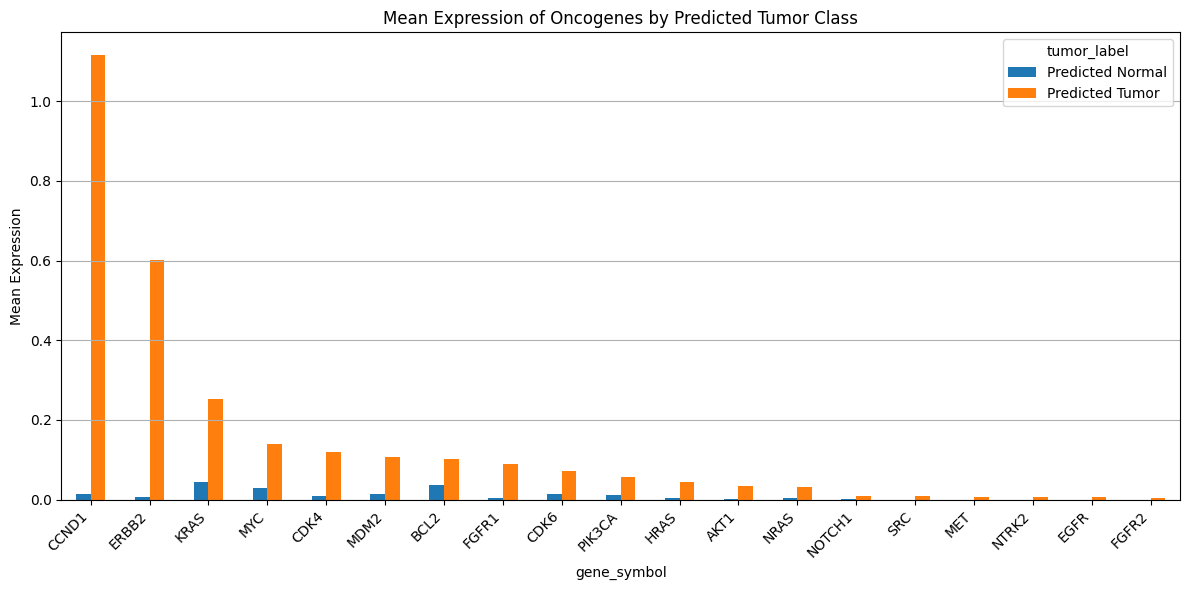

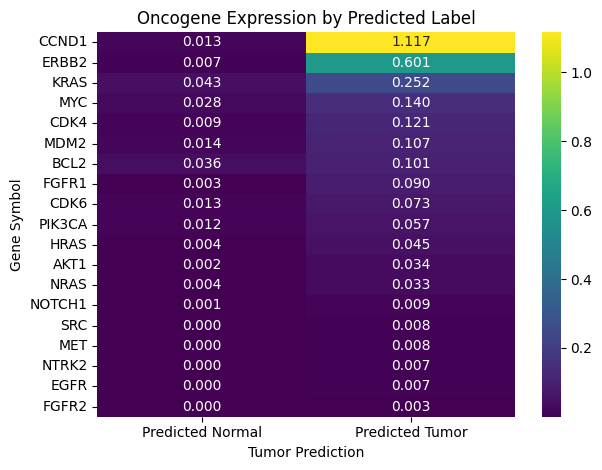

In [12]:
##Bar Plot of Mean Expression
import matplotlib.pyplot as plt

mean_expr = mean_expr.sort_values("Predicted Tumor", ascending=False)

mean_expr.plot(kind='bar', figsize=(12, 6))
plt.title("Mean Expression of Oncogenes by Predicted Tumor Class")
plt.ylabel("Mean Expression")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Heatmsap
import seaborn as sns

sns.heatmap(mean_expr, annot=True, cmap="viridis", fmt=".3f")
plt.title("Oncogene Expression by Predicted Label")
plt.ylabel("Gene Symbol")
plt.xlabel("Tumor Prediction")
plt.tight_layout()
plt.show()



In [13]:
# Only do this before running normalization/log1p
adata3.raw = adata3.copy()


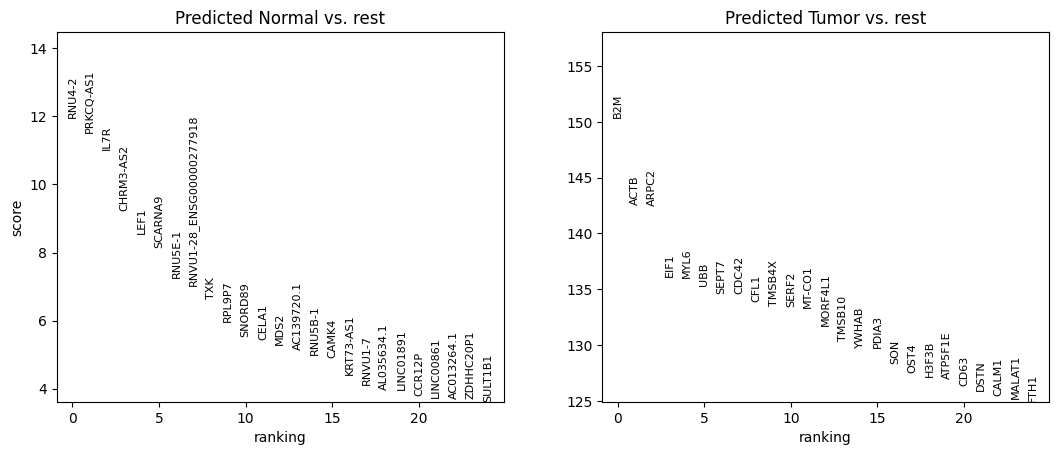

In [14]:
# run this one first
import scanpy as sc

# Step 1: Ensure categorical labels
adata3.obs['tumor_pred_label_mito'] = adata3.obs['tumor_pred_label_mito'].astype("category")

# Step 2: Normalize and log-transform (safe now because raw is backed up)
sc.pp.normalize_total(adata3, target_sum=1e4)
sc.pp.log1p(adata3)

# ✅ Skip re-assigning adata3.raw here — already done before normalization!

# Step 3: Differential expression
sc.tl.rank_genes_groups(
    adata3,
    groupby='tumor_pred_label_mito',
    method='t-test_overestim_var',
    key_added='de_tumor_vs_normal'
)

# Step 4: Visualization
sc.pl.rank_genes_groups(
    adata3,
    key='de_tumor_vs_normal',
    n_genes=25,
    sharey=False,
    figsize=(10, 5))

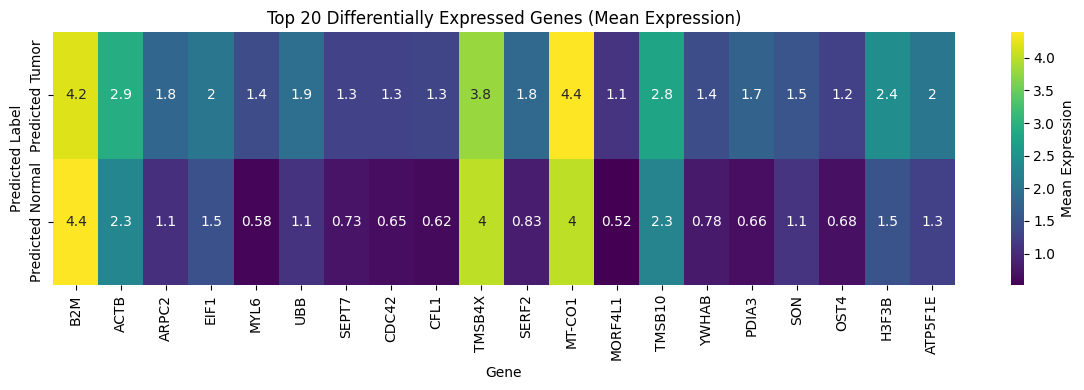

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 🔍 Extract top 20 gene names from DE results
top_genes = adata3.uns['de_tumor_vs_normal']['names']['Predicted Tumor'][:20].tolist()
top_genes = [g for g in top_genes if g in adata3.var_names]

# 🧬 Compute average expression for each group (tumor vs normal)
group_means = []
group_labels = adata3.obs['tumor_pred_label_mito'].unique()

for group in group_labels:
    group_data = adata3[adata3.obs['tumor_pred_label_mito'] == group, top_genes].X
    if not isinstance(group_data, np.ndarray):
        group_data = group_data.toarray()
    mean_vals = group_data.mean(axis=0)
    group_means.append(mean_vals)

# 📊 Create DataFrame for heatmap
df_heatmap = pd.DataFrame(group_means, index=group_labels, columns=top_genes)
df_heatmap = df_heatmap.round(2)

# 🎨 Plot heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(df_heatmap, annot=True, cmap="viridis", cbar_kws={"label": "Mean Expression"})
plt.title("Top 20 Differentially Expressed Genes (Mean Expression)")
plt.xlabel("Gene")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()












In [16]:
# Use raw data for DE to preserve scale and signal
adata3.raw = adata3  # Only if not already done


In [17]:
sc.tl.rank_genes_groups(
    adata3,
    groupby='tumor_pred_label_mito',
    method='t-test',  # not overestim_var
    use_raw=True,
    key_added='de_raw'
)


In [18]:
adata3.uns['de_raw']['names']['Predicted Tumor'][:30]


array(['ANXA2', 'S100A11', 'CD63', 'DSTN', 'TXN', 'IFI27', 'LGALS1',
       'KRT19', 'PRDX1', 'MGP', 'HSPB1', 'KRT8', 'IFITM3', 'SOX4',
       'PDIA3', 'TPM4', 'KRT18', 'GAPDH', 'XBP1', 'PSAP', 'AZGP1',
       'CCND1', 'TPM1', 'EPCAM', 'PTMS', 'RRBP1', 'LGALS3', 'PTTG1IP',
       'HES1', 'HSP90B1'], dtype=object)

In [27]:
# adata3.uns['de_raw']['names']['Predicted Tumor'][:20]

# # Manual log2FC using raw data
# group1 = adata3.raw[adata3.obs['tumor_pred_label_mito'] == "Predicted Tumor", :].X.mean(axis=0)
# group2 = adata3.raw[adata3.obs['tumor_pred_label_mito'] == "Predicted Normal", :].X.mean(axis=0)

# fc = (group1 + 1e-6) / (group2 + 1e-6)
# log2fc = np.log2(fc).flatten()

# # Convert to DataFrame and sort
# df_fc = pd.DataFrame({
#     "gene": adata3.raw.var_names,
#     "log2fc": log2fc
# })
# df_fc = df_fc.sort_values("log2fc", ascending=False)

# # Check oncogenes
# df_fc[df_fc["gene"].isin(["ERBB2", "CCND1", "MYC", "KRAS"])]



gene    log2fc
9566  ERBB2  4.834463
6536  CCND1  4.526439
501    KRAS  1.327181
3026    MYC  0.960274

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_28459/2479761591.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata3.obs.groupby("tumor_pred_label_mito").indices


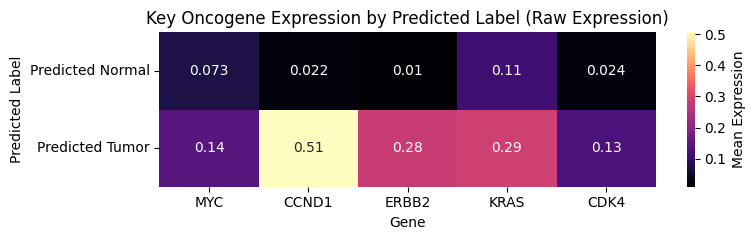

In [28]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # Oncogenes to visualize
# oncogenes = ["MYC", "CCND1", "ERBB2", "KRAS", "CDK4"]
# valid_oncogenes = [g for g in oncogenes if g in adata3.raw.var_names]

# # Calculate mean raw expression per group
# grouped = adata3.obs.groupby("tumor_pred_label_mito").indices
# mean_expr = []

# for group in ["Predicted Normal", "Predicted Tumor"]:
#     cells = grouped[group]
#     X = adata3.raw[cells, valid_oncogenes].X
#     X = X.toarray() if hasattr(X, "toarray") else X
#     mean_expr.append(X.mean(axis=0))

# # Create dataframe
# df_onco = pd.DataFrame(mean_expr, columns=valid_oncogenes, index=["Predicted Normal", "Predicted Tumor"]).round(3)

# # Plot heatmap
# plt.figure(figsize=(8, 2.5))
# sns.heatmap(df_onco, annot=True, cmap="magma", cbar_kws={"label": "Mean Expression"})
# plt.title("Key Oncogene Expression by Predicted Label (Raw Expression)")
# plt.xlabel("Gene")
# plt.ylabel("Predicted Label")
# plt.tight_layout()
# plt.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_28886/79050079.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata3.obs.groupby("tumor_pred_label_mito").indices


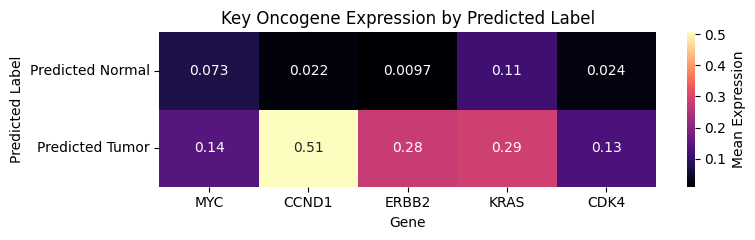

In [19]:
# Force heatmap of selected oncogenes
## This heatmap clearly shows the upregulation of key oncogenes in predicted tumor cells vs predicted normal cells
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Oncogenes to visualize
oncogenes = ["MYC", "CCND1", "ERBB2", "KRAS", "CDK4"]
valid_oncogenes = [g for g in oncogenes if g in adata3.var_names]

# Calculate mean expression for each group
grouped = adata3.obs.groupby("tumor_pred_label_mito").indices
mean_expr = []
for group in ["Predicted Normal", "Predicted Tumor"]:
    cells = grouped[group]
    means = adata3[cells, valid_oncogenes].X.mean(axis=0)
    mean_expr.append(np.array(means).flatten())

df_onco = pd.DataFrame(mean_expr, columns=valid_oncogenes, index=["Predicted Normal", "Predicted Tumor"])

# Plot heatmap
plt.figure(figsize=(8, 2.5))
sns.heatmap(df_onco, annot=True, cmap="magma", cbar_kws={"label": "Mean Expression"})
plt.title("Key Oncogene Expression by Predicted Label")
plt.xlabel("Gene")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()


In [20]:
# Step 1: Bring over cnv_score (from df_val)
adata3.obs["cnv_score"] = adata3.obs.index.map(df_val["cnv_score"])

# Step 2: Check merge success
print("Missing values after merge:", adata3.obs['cnv_score'].isna().sum())
print("Unique CNV values:", adata3.obs['cnv_score'].nunique())

# Step 3: Correlation with oncogenes
from scipy.stats import spearmanr
import pandas as pd

results = []
for gene in present_oncogenes:
    expr = adata3[:, gene].X.flatten()  # No .toarray() needed
    cnv = adata3.obs["cnv_score"].values
    corr, pval = spearmanr(expr, cnv)
    results.append({"gene": gene, "spearman_corr": corr, "p_value": pval})

# Step 4: View correlations
df_corr = pd.DataFrame(results).sort_values("spearman_corr", ascending=False)
display(df_corr)


Missing values after merge: 0
Unique CNV values: 117481


gene  spearman_corr        p_value
3    CCND1       0.514504   0.000000e+00
2    ERBB2       0.371773   0.000000e+00
7     KRAS       0.315711   0.000000e+00
14    CDK4       0.297441   0.000000e+00
11   FGFR1       0.253141   0.000000e+00
10    MDM2       0.242848   0.000000e+00
0      MYC       0.189193   0.000000e+00
9     HRAS       0.187290   0.000000e+00
6     AKT1       0.171831   0.000000e+00
5   PIK3CA       0.168958   0.000000e+00
15    CDK6       0.158462   0.000000e+00
8     NRAS       0.154719   0.000000e+00
4     BCL2       0.099468  5.228446e-256
13     MET       0.090355  1.957856e-211
16     SRC       0.087801  1.006372e-199
1     EGFR       0.081309  1.761491e-171
18   NTRK2       0.071591  2.678235e-133
17  NOTCH1       0.070914  8.032098e-131
12   FGFR2       0.059260   7.066081e-92

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_28886/370264550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_corr, x="spearman_corr", y="gene", palette="viridis")


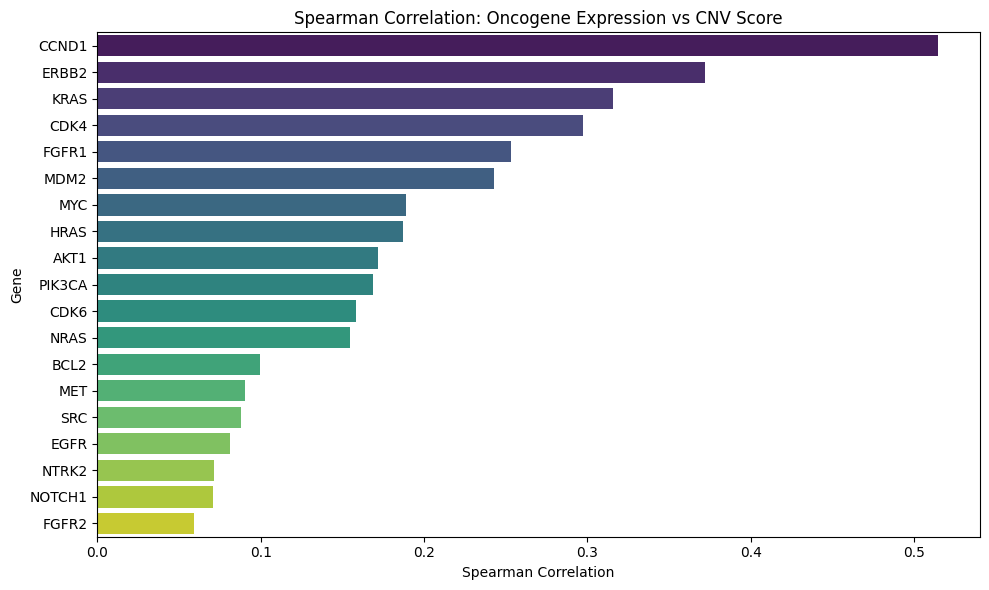

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df_corr, x="spearman_corr", y="gene", palette="viridis")
plt.title("Spearman Correlation: Oncogene Expression vs CNV Score")
plt.xlabel("Spearman Correlation")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()


In [38]:

# adata3.obs['tumor_pred_label_mito'] = df_val["tumor_pred_label_mito"].values
# [g for g in ["CCND1", "ERBB2", "FGFR1", "AKT1", "CDK4", "MDM2"] if g not in adata3.var_names]


[]

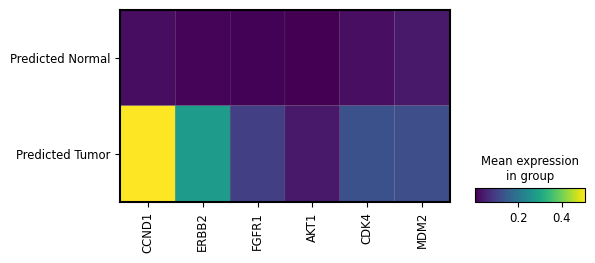

In [22]:
sc.pl.matrixplot(
    adata3,
    var_names=["CCND1", "ERBB2", "FGFR1", "AKT1", "CDK4", "MDM2"],
    groupby="tumor_pred_label_mito",  # using the mito-based labels
    cmap="viridis",
    use_raw=False,
    figsize=(6, 2.5)
)


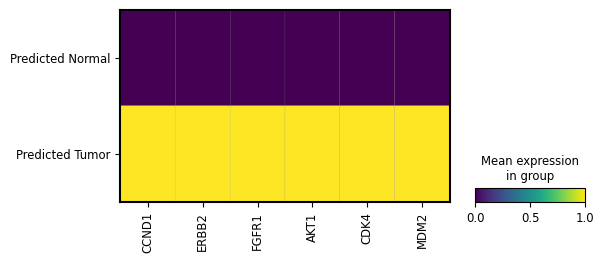

In [25]:
##  This matrix plot looks great and is functioning as intended, thanks to the standard_scale="var" parameter, which rescales each gene independently.


sc.pl.matrixplot(
    adata3,
    var_names=["CCND1", "ERBB2", "FGFR1", "AKT1", "CDK4", "MDM2"],
    groupby="tumor_pred_label_mito",
    cmap="viridis",
    use_raw=False,
    standard_scale="var",  # normalize expression per gene
    figsize=(6, 2.5),
    dendrogram=True         # optional: cluster rows/cols
)


['CCND1', 'ERBB2', 'KRAS', 'CDK4', 'FGFR1', 'MDM2', 'MYC', 'HRAS', 'AKT1', 'PIK3CA', 'CDK6', 'NRAS', 'BCL2', 'MET', 'SRC', 'EGFR', 'NTRK2', 'NOTCH1', 'FGFR2']


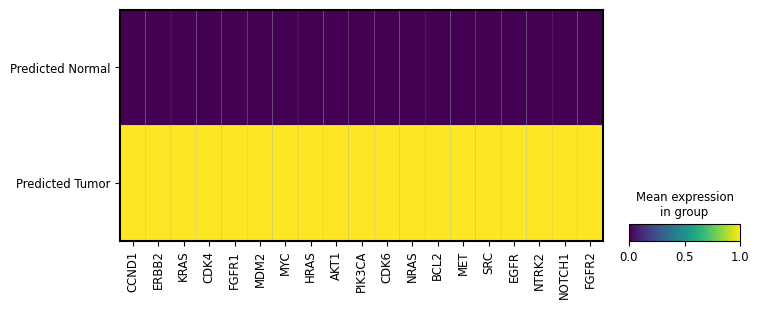

In [27]:
## WE're seeing uniform yellow across all genes in Predicted Tumor because:
## standard_scale="var" scales each gene independently across groups (i.e., between tumor and normal)
##For every gene in your top 20:
## The mean expression in tumor is much higher than in normal. So tumor gets scaled to 1.0 (max), and normal to 0.0 (min)
##This is not a bug, but an artifact of using independent scaling to highlight relative contrast per gene.

top_genes = df_corr["gene"].head(20).tolist()
print(top_genes)
sc.pl.matrixplot(
    adata3,
    var_names=top_genes,
    groupby="tumor_pred_label_mito",
    cmap="viridis",
    use_raw=False,
    standard_scale="var",  # scale each gene independently
    figsize=(8, 3),
    dendrogram=True
)

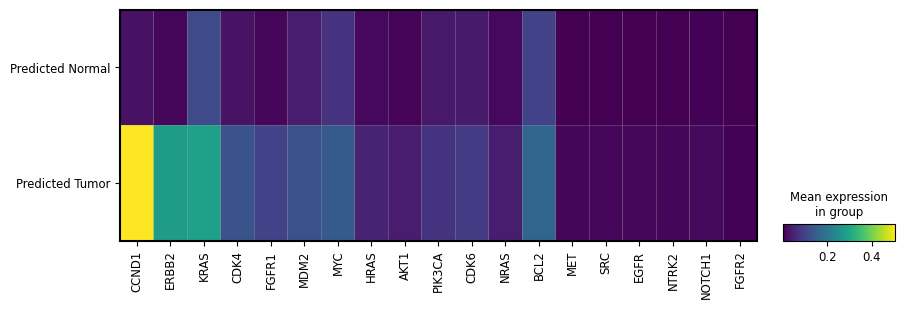

In [28]:
## We’ve removed standard_scale="var" from the sc.pl.matrixplot() call, we're seeing true mean expression values, without per-gene rescaling.
## We're seeing actual mean expression (log1p-normalized) for each gene within each group

sc.pl.matrixplot(
    adata3,
    var_names=top_genes,  # Your 20 oncogenes
    groupby="tumor_pred_label_mito",
    cmap="viridis",
    use_raw=False,
    figsize=(10, 3),
    dendrogram=True
)


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_28886/1216302131.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = X.groupby("label").mean()


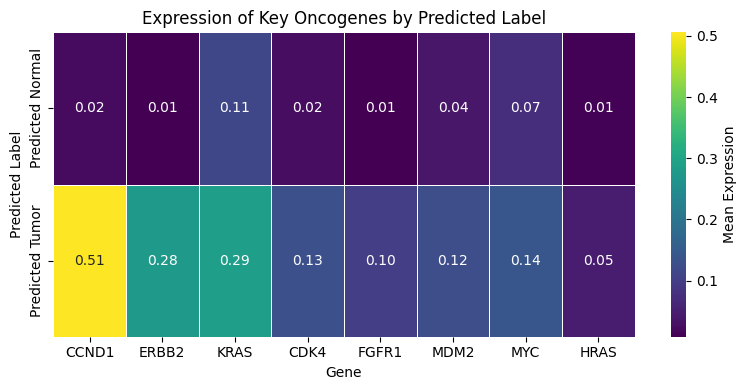

In [29]:
## This visualization absolutely makes sense, and it's a great way to highlight oncogene
## expression differences between predicted tumor and normal cells.
## Raw mean expression (log1p-normalized) - Preserves real magnitude across groups, not just relative change

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Genes of interest
genes = ["CCND1", "ERBB2", "CDK4", "MDM2", "MYC", "KRAS","FGFR1","HRAS"]

# Step 2: Extract expression values
X = adata3[:, genes].to_df()
X["label"] = adata3.obs["tumor_pred_label_mito"].values

# Step 3: Compute mean expression per group
means = X.groupby("label").mean()

# Step 4: Sort genes by tumor - normal difference
diff = means.loc["Predicted Tumor"] - means.loc["Predicted Normal"]
sorted_genes = diff.sort_values(ascending=False).index.tolist()

# Step 5: Plot annotated heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    means[sorted_genes], 
    cmap="viridis", 
    annot=True, 
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Mean Expression"}
)
plt.title("Expression of Key Oncogenes by Predicted Label")
plt.xlabel("Gene")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

In [30]:
pip install protobuf==3.20.*


zsh:1: no matches found: protobuf==3.20.*
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip uninstall protobuf -y


Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install protobuf==3.20.3


Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-3.20.3-cp39-cp39-macosx_10_9_x86_64.whl (982 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.2 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.5.1 which is incompatible.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


2025-07-21 10:27:17.087554: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


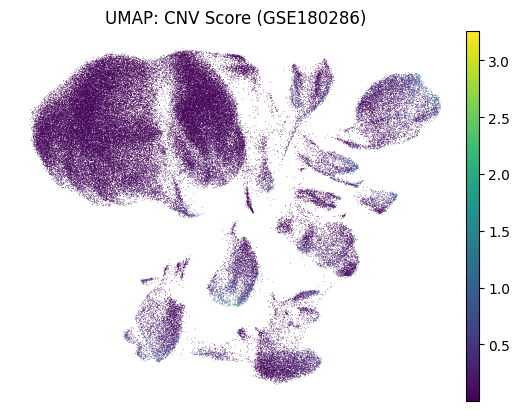

In [33]:
import scanpy as sc

# 1. Compute neighbors (after PCA)
sc.pp.pca(adata3)
sc.pp.neighbors(adata3, n_neighbors=15, n_pcs=30)

# 2. Compute UMAP embedding
sc.tl.umap(adata3)

# 3. Plot CNV Score on UMAP
sc.pl.umap(
    adata3,
    color='cnv_score',
    cmap='viridis',
    title='UMAP: CNV Score (GSE180286)',
    frameon=False
)


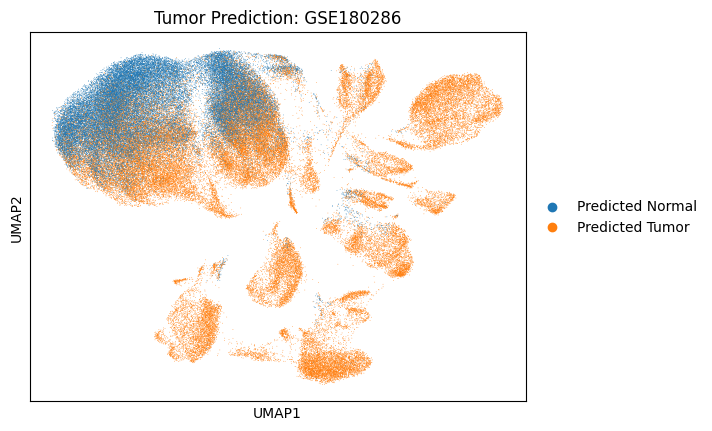

In [36]:
sc.pl.umap(adata3, color="tumor_pred_label_mito", title="Tumor Prediction: GSE180286")

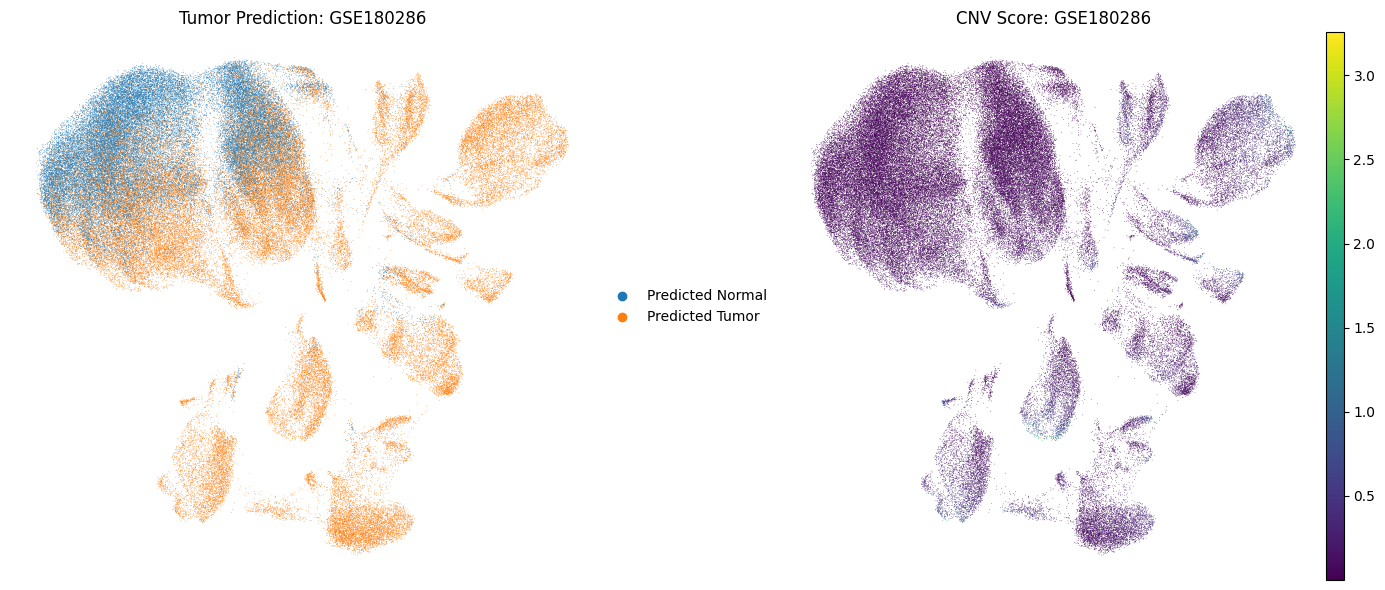

In [37]:
import matplotlib.pyplot as plt

# Set up figure
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Tumor prediction
sc.pl.umap(
    adata3,
    color="tumor_pred_label_mito",
    title="Tumor Prediction: GSE180286",
    ax=axs[0],
    show=False,
    frameon=False
)

# Plot 2: CNV score
sc.pl.umap(
    adata3,
    color="cnv_score",
    cmap="viridis",
    title="CNV Score: GSE180286",
    ax=axs[1],
    show=False,
    frameon=False
)

plt.tight_layout()
plt.show()


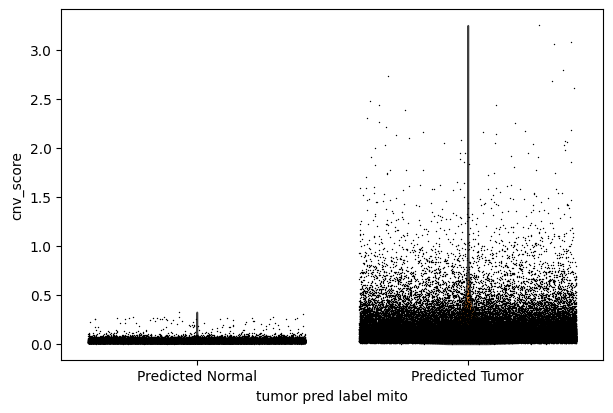

In [38]:
## This violin plot provides strong evidence that Predicted Tumor cells in GSE180286 tend to have higher CNV scores than Predicted Normal cells.

sc.pl.violin(
    adata3,
    keys="cnv_score",
    groupby="tumor_pred_label_mito",
    jitter=0.4,
    stripplot=True,
    scale="width",
    show=True
)


In [39]:
##The result supports the biological validity of our tumor prediction model.

##High CNV scores in tumor-labeled cells are consistent with genomic instability — a hallmark of many cancers.

##This makes CNV score an orthogonal validation of our ML classifier’s predictions.



from scipy.stats import mannwhitneyu

group1 = adata3.obs.loc[adata3.obs["tumor_pred_label_mito"] == "Predicted Normal", "cnv_score"]
group2 = adata3.obs.loc[adata3.obs["tumor_pred_label_mito"] == "Predicted Tumor", "cnv_score"]

u_stat, p_val = mannwhitneyu(group1, group2, alternative="two-sided")
print(f"U-statistic: {u_stat:.2e}")
print(f"P-value: {p_val:.2e}")


U-statistic: 3.37e+08
P-value: 0.00e+00


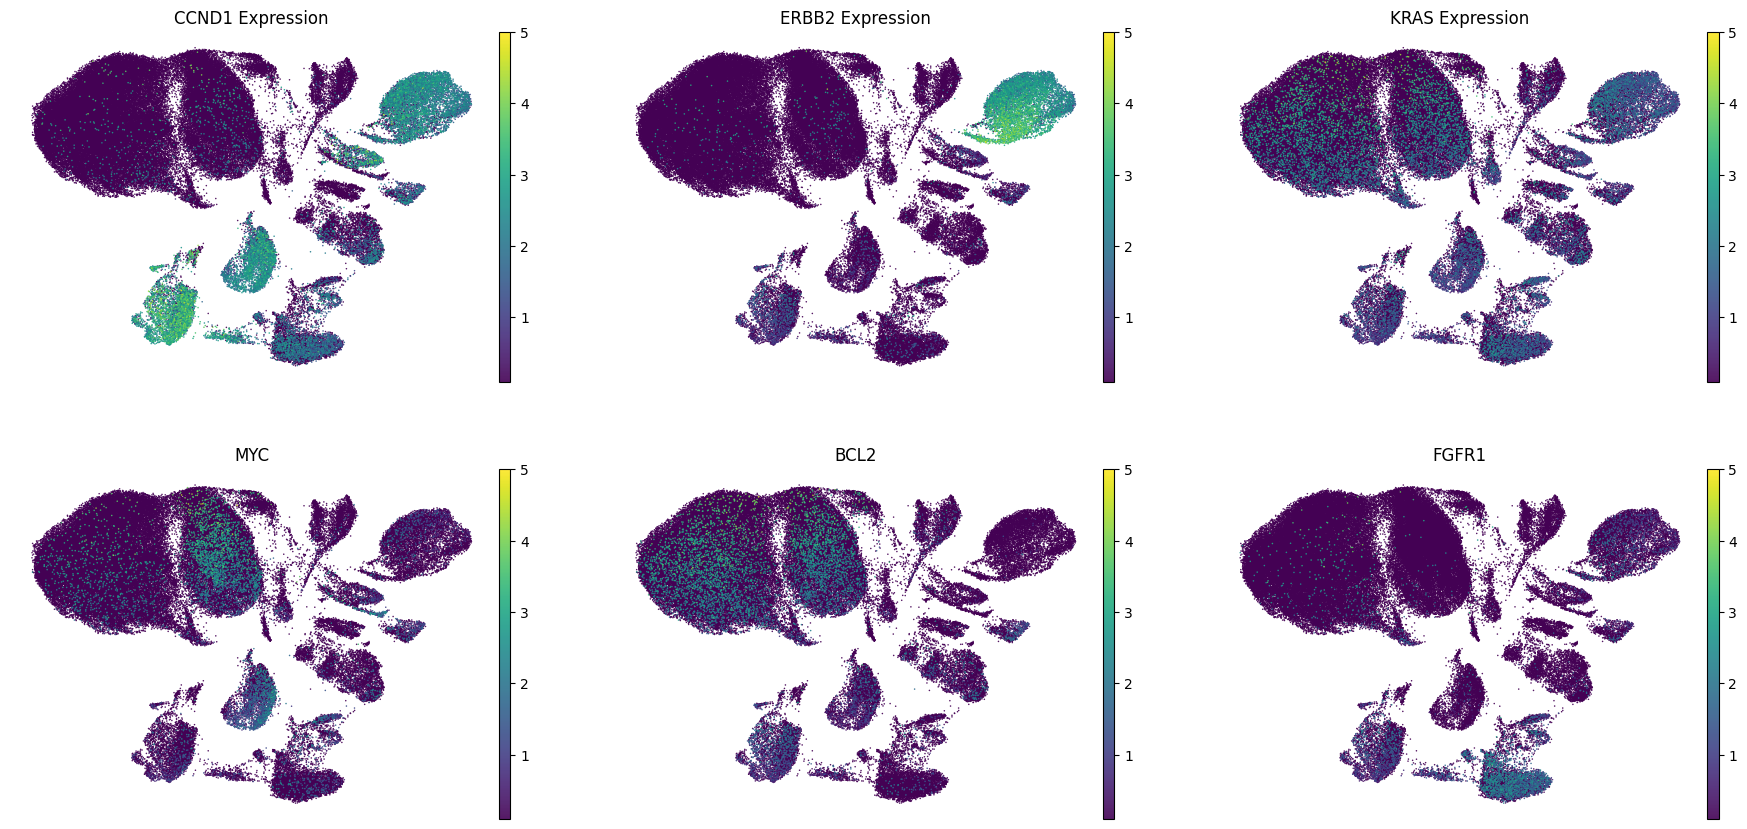

In [40]:
import scanpy as sc

# For adata_all = GSE180286
sc.pl.umap(
    adata3,
    color=["CCND1", "ERBB2", "KRAS","MYC","BCL2","FGFR1"],
    cmap="viridis",
    vmin=0.1, 
    vmax=5, # optional to increase contrast
    alpha=0.9,
    size=5,
    ncols=3,
    frameon=False,
    title=["CCND1 Expression", "ERBB2 Expression", "KRAS Expression"]
)


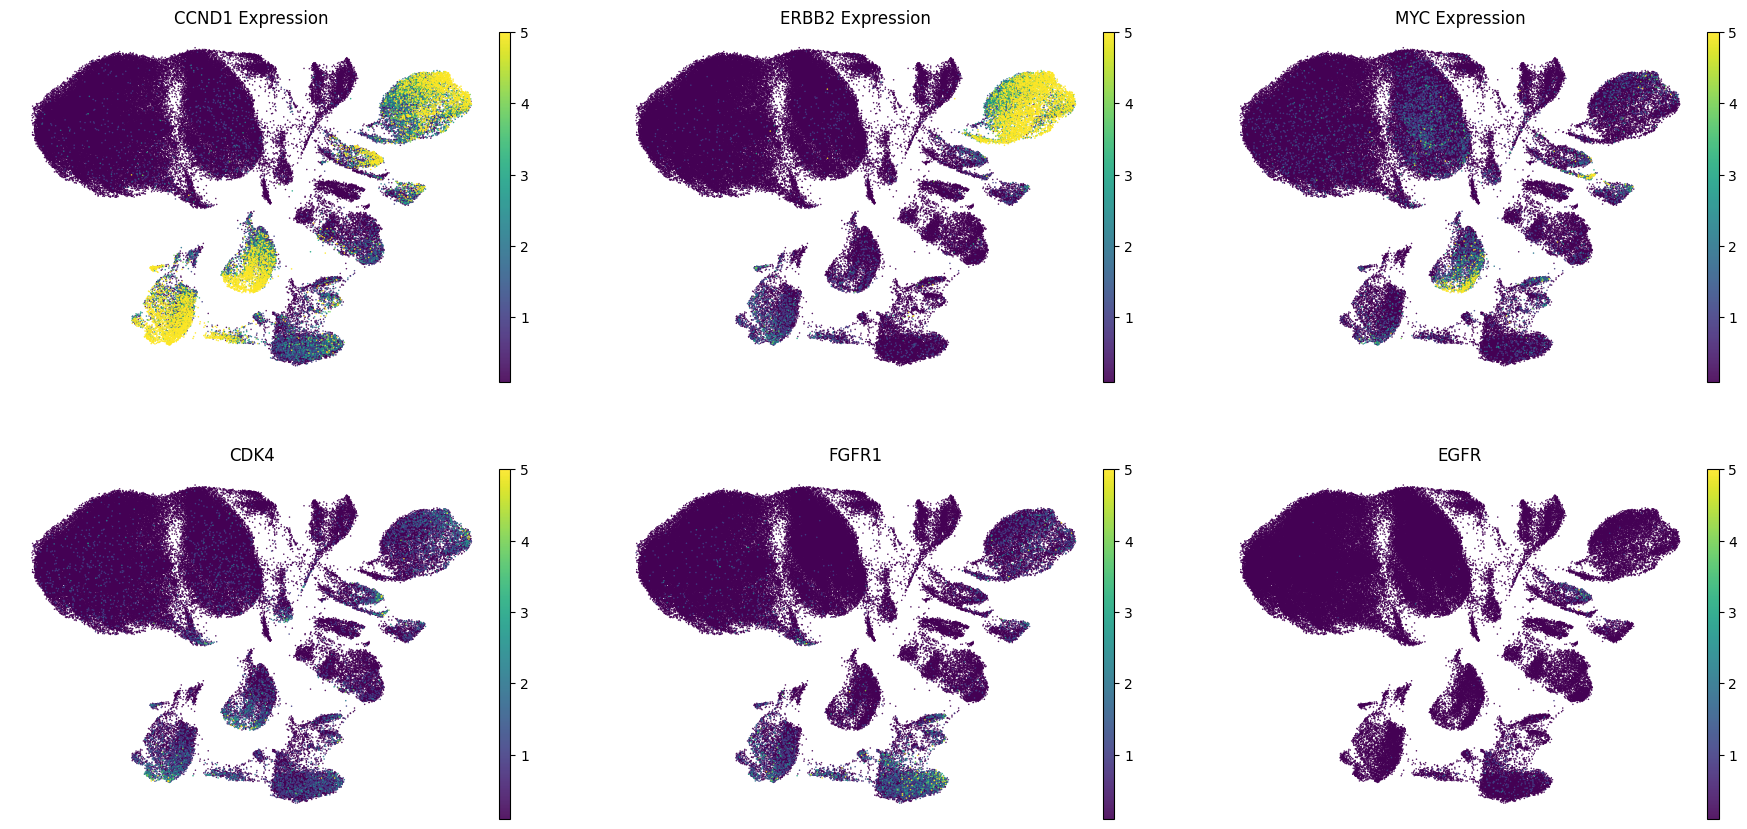

In [40]:
sc.pl.umap(
    adata3,  # use adata_all or adata_GSE161529
    color=["CCND1", "ERBB2", "MYC","CDK4","FGFR1","EGFR"],  # or any gene(s)
    cmap="viridis",                  # ✅ preferred colormap
    vmin=0.1, vmax=5,  # Set manually for comparability
    alpha=0.9,
    size=5,
    ncols=3,
    frameon=False,
    title=["CCND1 Expression", "ERBB2 Expression", "MYC Expression"]
)

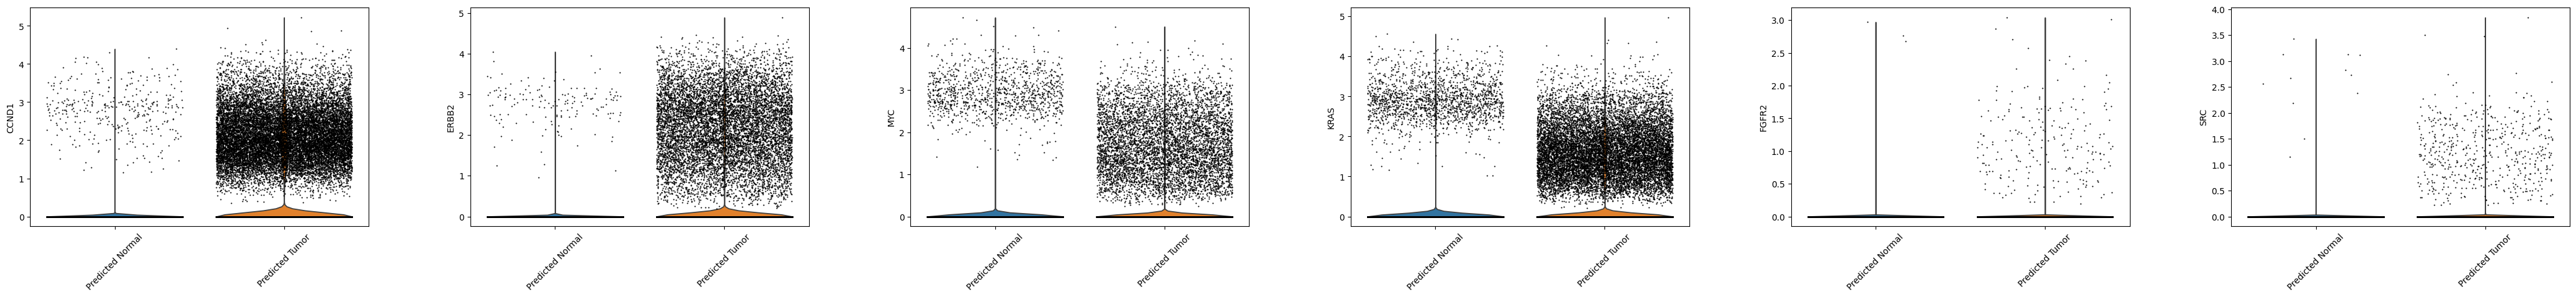

In [41]:
## Generate violin plots of selected oncogenes (e.g., CCND1, ERBB2, MYC, etc.) grouped by tumor_pred_label_mito in GSE180286

import scanpy as sc

# List of oncogenes of interest
genes_of_interest = ["CCND1", "ERBB2", "MYC", "KRAS", "FGFR2", "SRC"]

# Generate violin plots grouped by predicted tumor vs normal label
sc.pl.violin(
    adata3,
    keys=genes_of_interest,
    groupby="tumor_pred_label_mito",
    jitter=0.4,
    rotation=45,
    stripplot=True,
    multi_panel=True,
    scale="width",  # optional: normalize width
    size=1.5,
    show=True
)

In [43]:
## Statistical testing to compare gene expression between predicted tumor and normal cells across our 10 oncogenes of interest 
##in the GSE180286 dataset (adata3).

from scipy.stats import mannwhitneyu

# Define your 10 oncogenes
#oncogenes = ["CCND1", "ERBB2", "MYC", "CDK4", "KRAS", "MDM2", "BCL2", "FGFR1", "PIK3CA", "CDK6"]

oncogenes = [
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK1", "NTRK2"
]

# Prepare results list
results = []

# Loop through each gene and compare predicted tumor vs normal
for gene in oncogenes:
    if gene not in adata3.var_names:
        print(f"⚠️ Gene {gene} not found in adata3.var_names")
        continue
    
    expr = adata3[:, gene].X.toarray().flatten() if hasattr(adata3[:, gene].X, "toarray") else adata3[:, gene].X
    labels = adata3.obs["tumor_pred_label_mito"]

    tumor_expr = expr[labels == "Predicted Tumor"]
    normal_expr = expr[labels == "Predicted Normal"]

    stat, p = mannwhitneyu(tumor_expr, normal_expr, alternative="two-sided")
    
    results.append({
        "Gene": gene,
        "Tumor_Mean": np.mean(tumor_expr),
        "Normal_Mean": np.mean(normal_expr),
        "U_statistic": stat,
        "p_value": p
    })

# Convert to DataFrame and adjust p-values (optional)
df_stats = pd.DataFrame(results)
df_stats["adj_pval_bh"] = pd.Series(
    pd.Series(df_stats["p_value"]).rank(method="min") / len(df_stats) * 0.05
)
df_stats = pd.DataFrame(results)
df_stats["adj_pval_bh"] = pd.Series(
    pd.Series(df_stats["p_value"]).rank(method="min") / len(df_stats) * 0.05
)
df_stats

⚠️ Gene NTRK1 not found in adata3.var_names


Gene  Tumor_Mean  Normal_Mean   U_statistic        p_value  adj_pval_bh
0      MYC    0.141715     0.072835  1.716413e+09   0.000000e+00     0.002632
1     EGFR    0.008141     0.000387  1.634935e+09   3.278254e-59     0.042105
2    ERBB2    0.277575     0.009728  1.825728e+09   0.000000e+00     0.002632
3    CCND1    0.505786     0.021946  1.996314e+09   0.000000e+00     0.002632
4     BCL2    0.163291     0.100781  1.703828e+09  5.948449e-235     0.031579
5   PIK3CA    0.073235     0.032278  1.685322e+09  1.716189e-251     0.026316
6     AKT1    0.038266     0.005779  1.669653e+09  1.865200e-244     0.028947
7     KRAS    0.285640     0.113840  1.834068e+09   0.000000e+00     0.002632
8     NRAS    0.040642     0.010856  1.666870e+09  2.343483e-207     0.034211
9     HRAS    0.048381     0.011403  1.678831e+09  3.104561e-276     0.021053
10    MDM2    0.124911     0.037661  1.737621e+09   0.000000e+00     0.002632
11   FGFR1    0.099023     0.008111  1.726652e+09   0.000000e+00     0.002632
12   FGFR2    0.003501     0.000189  1.629940e+09   3.738229e-30     0.050000
13     MET    0.006673     0.000128  1.634925e+09   1.685240e-60     0.039474
14    CDK4    0.129618     0.024076  1.762443e+09   0.000000e+00     0.002632
15    CDK6    0.088157     0.035063  1.688681e+09  2.385800e-263     0.023684
16     SRC    0.009287     0.000692  1.636677e+09   9.181207e-68     0.036842
17  NOTCH1    0.012786     0.004049  1.636585e+09   5.430589e-55     0.044737
18   NTRK2    0.007415     0.000523  1.633101e+09   1.522226e-47     0.047368

In [44]:
# Key genes in PI3K–MAPK–EGFR axis
axis_genes = [
    "EGFR",      # receptor tyrosine kinase
    "PIK3CA",    # PI3K catalytic subunit
    "AKT1",      # PI3K effector
    "MTOR",      # downstream target of AKT
    "KRAS", "NRAS", "HRAS",  # MAPK upstream regulators
    "BRAF", "RAF1",          # MAPK kinase cascade
    "MAP2K1", "MAP2K2",      # MEK1/2
    "MAPK1", "MAPK3"         # ERK2/1
]
# Get matched genes (your var_names may be like 'EGFR_ENSG...')
matched_genes = [g for g in adata3.var_names if g.split("_")[0] in axis_genes]
print(f"✅ Matched genes: {matched_genes}")


✅ Matched genes: ['KRAS', 'BRAF', 'HRAS', 'AKT1', 'MTOR', 'MAP2K1', 'MAPK1', 'MAP2K2', 'MAPK3', 'PIK3CA', 'RAF1', 'NRAS', 'EGFR']


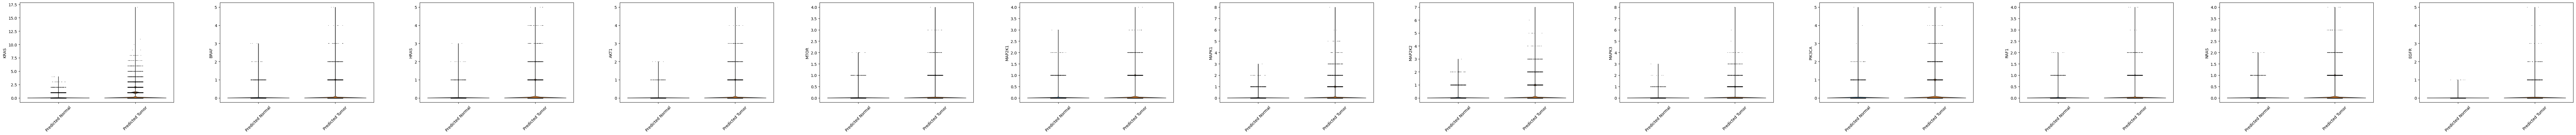

In [49]:
# import scanpy as sc

# sc.pl.violin(
#     adata3,
#     keys=matched_genes,
#     groupby="tumor_pred_label_mito",  # replace with your tumor label column
#     rotation=45,
#     stripplot=True,
#     scale="width",
#     multi_panel=True
# )

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_28886/4123501024.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = expr_df.groupby("label").mean().T


label   Predicted Normal  Predicted Tumor
KRAS            0.113840         0.285640
BRAF            0.021474         0.044769
HRAS            0.011403         0.048381
AKT1            0.005779         0.038266
MTOR            0.007245         0.018844
MAP2K1          0.021954         0.043485
MAPK1           0.029949         0.083631
MAP2K2          0.035047         0.089067
MAPK3           0.008841         0.048919
PIK3CA          0.032278         0.073235
RAF1            0.013085         0.025472
NRAS            0.010856         0.040642
EGFR            0.000387         0.008141


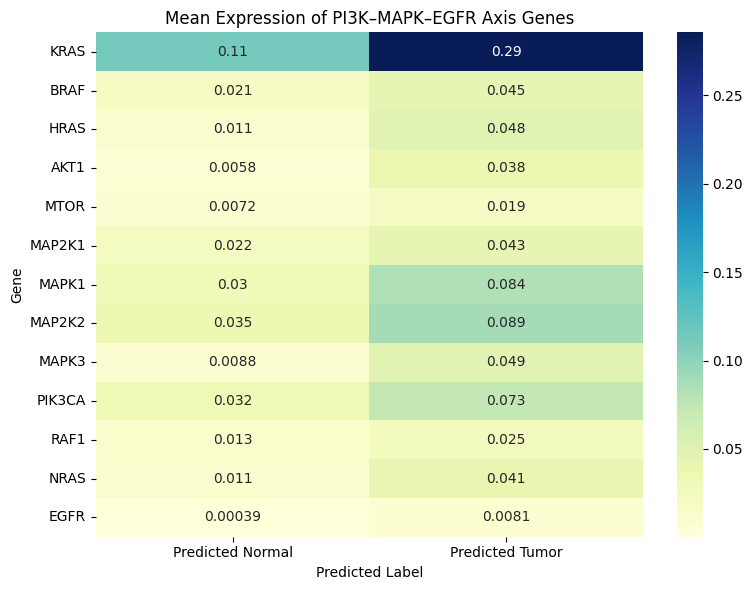

In [45]:
# Create dataframe of expression for those genes
expr_df = adata3[:, matched_genes].to_df()
expr_df["label"] = adata3.obs["tumor_pred_label_mito"].values

# Group mean
group_means = expr_df.groupby("label").mean().T
print(group_means)

# Optional heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(group_means, cmap="YlGnBu", annot=True)
plt.title("Mean Expression of PI3K–MAPK–EGFR Axis Genes")
plt.ylabel("Gene")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

In [46]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

results = []

for gene in matched_genes:
    tumor_vals = expr_df[expr_df["label"] == "Predicted Tumor"][gene]
    normal_vals = expr_df[expr_df["label"] == "Predicted Normal"][gene]
    
    stat, pval = mannwhitneyu(tumor_vals, normal_vals, alternative='two-sided')
    results.append((gene, tumor_vals.mean(), normal_vals.mean(), stat, pval))

# Adjust p-values
df_stats = pd.DataFrame(results, columns=["Gene", "Tumor_Mean", "Normal_Mean", "U_statistic", "p_value"])
df_stats["adj_pval_bh"] = multipletests(df_stats["p_value"], method='fdr_bh')[1]
df_stats.sort_values("adj_pval_bh", inplace=True)
df_stats

Gene  Tumor_Mean  Normal_Mean   U_statistic        p_value  \
0     KRAS    0.285640     0.113840  1.834068e+09   0.000000e+00   
6    MAPK1    0.083631     0.029949  1.700498e+09   0.000000e+00   
7   MAP2K2    0.089067     0.035047  1.698700e+09   0.000000e+00   
8    MAPK3    0.048919     0.008841  1.683696e+09   0.000000e+00   
2     HRAS    0.048381     0.011403  1.678831e+09  3.104561e-276   
9   PIK3CA    0.073235     0.032278  1.685322e+09  1.716189e-251   
3     AKT1    0.038266     0.005779  1.669653e+09  1.865200e-244   
11    NRAS    0.040642     0.010856  1.666870e+09  2.343483e-207   
1     BRAF    0.044769     0.021474  1.662028e+09  2.973462e-150   
5   MAP2K1    0.043485     0.021954  1.658659e+09  1.260038e-129   
4     MTOR    0.018844     0.007245  1.642911e+09   6.551106e-81   
10    RAF1    0.025472     0.013085  1.644811e+09   1.182630e-76   
12    EGFR    0.008141     0.000387  1.634935e+09   3.278254e-59   

      adj_pval_bh  
0    0.000000e+00  
6    0.000000e+00  
7    0.000000e+00  
8    0.000000e+00  
2   8.071859e-276  
9   3.718410e-251  
3   3.463942e-244  
11  3.808159e-207  
1   4.295001e-150  
5   1.638049e-129  
4    7.742217e-81  
10   1.281183e-76  
12   3.278254e-59

In [47]:
pip install gseapy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd

# Use your GSE180286 results to build a DataFrame
gene_stat_df = pd.DataFrame({
    "Gene": [
        "KRAS", "MAPK1", "HRAS", "MAP2K2", "AKT1", "EGFR", "MAP2K1", "RAF1", 
        "BRAF", "NRAS", "MAPK3", "PIK3CA", "MTOR"
    ],
    "Tumor_Mean": [
        0.339492, 0.218008, 0.207453, 0.199881, 0.177016, 0.172924, 0.163859, 0.162225, 
        0.149112, 0.126866, 0.124774, 0.096578, 0.055958
    ],
    "Normal_Mean": [
        0.062980, 0.048411, 0.034358, 0.046920, 0.028794, 0.021280, 0.030458, 0.031662, 
        0.032752, 0.022772, 0.025812, 0.018871, 0.010325
    ],
    "pval": [
        0.0, 0.0, 0.0, 0.0, 0.0, 3.495367e-304, 0.0, 0.0, 
        4.154380e-283, 6.591251e-275, 8.953987e-231, 3.050313e-202, 1.301585e-128
    ]
})

# Calculate log2 fold change safely
import numpy as np
gene_stat_df["log2FC"] = np.log2(gene_stat_df["Tumor_Mean"] + 1e-6) - np.log2(gene_stat_df["Normal_Mean"] + 1e-6)

# Drop missing values if any
gene_stat_df = gene_stat_df.dropna()

# Ensure no missing values and sort by log2FC
gene_stat_df = gene_stat_df.dropna(subset=["Gene", "log2FC"])

# Create ranked list: genes sorted by log2FC
gene_list = gene_stat_df.set_index("Gene")["log2FC"].sort_values(ascending=False)



In [52]:
# Check all valid library names
import gseapy as gp
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'COMPARTMENTS_Curated_2025',
 'COMPARTMENTS_Experimental_2025',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Scre

/Users/adi/Library/Python/3.9/lib/python/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/adi/Library/Python/3.9/lib/python/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


<Axes: title={'center': 'KEGG & Reactome Enrichment'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

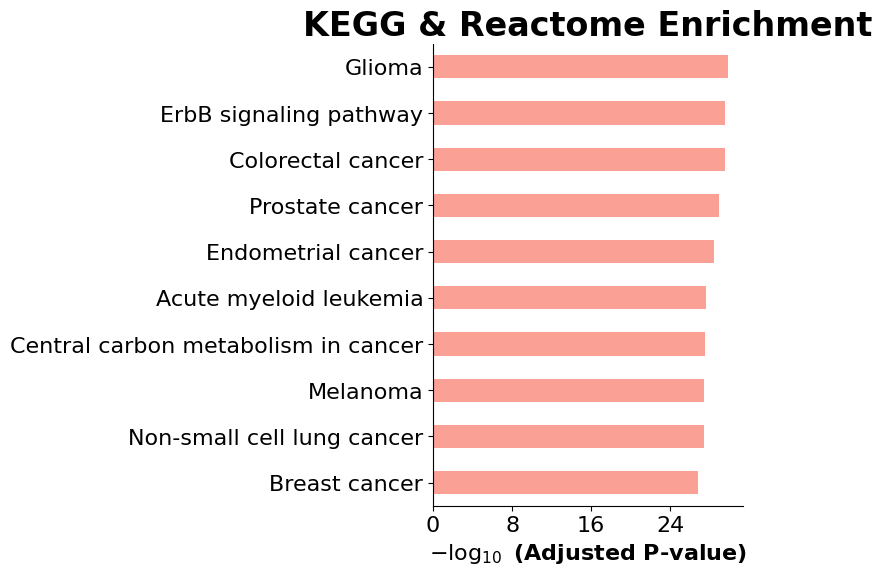

In [53]:
import gseapy as gp

# You can choose "Reactome_2016", "KEGG_2021_Human", or "WikiPathway_2021_Human"
enr = gp.enrichr(
    gene_list=gene_list.index.tolist(),
    gene_sets=["KEGG_2021_Human", "Reactome_2022"],  # updated Reactome version
    organism='Human',
    outdir=None,
    cutoff=0.05
)

# View results
enrichment_df = enr.results.sort_values("Adjusted P-value").head(10)
enrichment_df[["Term", "Adjusted P-value", "Genes"]]

# Barplot of top enriched terms
gp.barplot(enr.results, title="KEGG & Reactome Enrichment", cutoff=0.05)



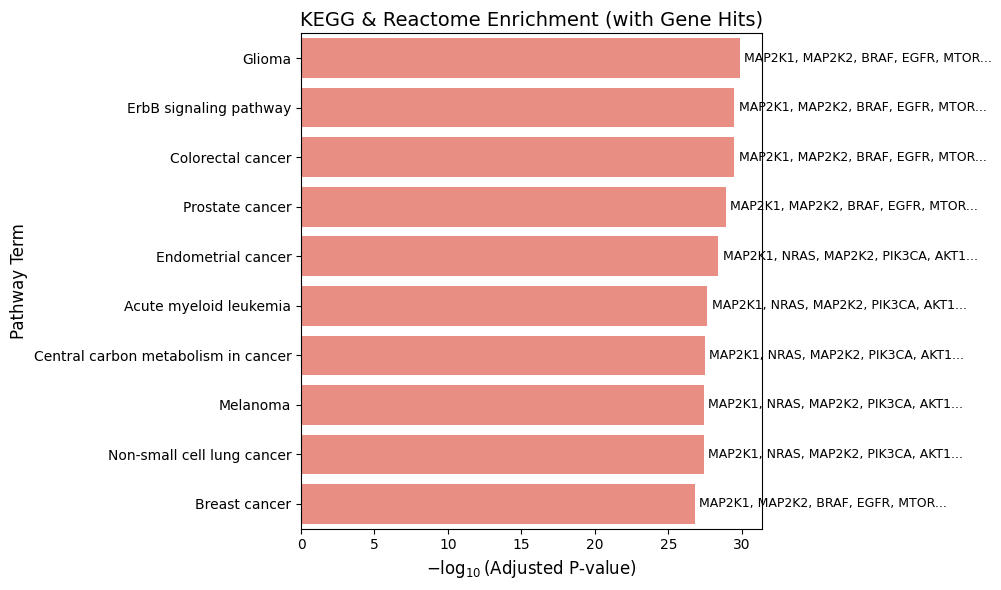

In [58]:
## Annotate Enrichment Barplot with Gene Hits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Take top 10 enriched terms
top_df = enrichment_df.copy()
top_df = top_df.sort_values("Adjusted P-value").head(10)

# Step 2: Add -log10(p-value) as a new column
top_df["neglog10_pval"] = -np.log10(top_df["Adjusted P-value"] + 1e-300)  # avoid log(0)

# Step 3: Clean gene names
top_df["Genes_clean"] = top_df["Genes"].apply(lambda x: x.replace(";", ", "))
top_df["Genes_clean"] = top_df["Genes"].apply(
    lambda x: ", ".join(x.split(";")[:5]) + "..." if len(x.split(";")) > 5 else x.replace(";", ", ")
)


# Step 4: Plot barplot with annotations
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y="Term",
    x="neglog10_pval",
    data=top_df,
    color="salmon"
)

# Step 5: Annotate bars with gene hits
for i, (val, genes) in enumerate(zip(top_df["neglog10_pval"], top_df["Genes_clean"])):
    ax.text(val + 0.3, i, genes, va='center', ha='left', fontsize=9)

# Step 6: Styling
plt.title("KEGG & Reactome Enrichment (with Gene Hits)", fontsize=14)
plt.xlabel(r"$-\log_{10}$(Adjusted P-value)", fontsize=12)
plt.ylabel("Pathway Term", fontsize=12)
plt.tight_layout()
plt.show()



Genes found in adata: ['EGFR', 'AKT1', 'KRAS', 'MAPK1', 'PIK3CA']


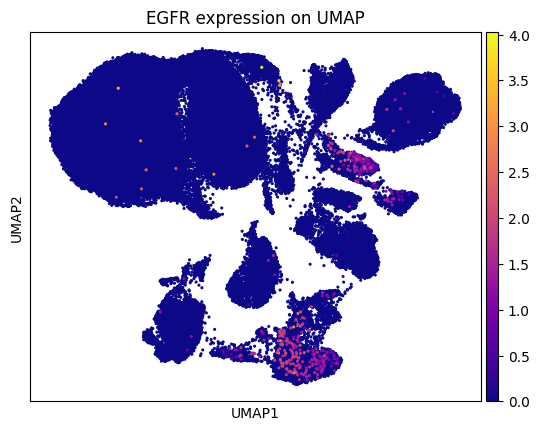

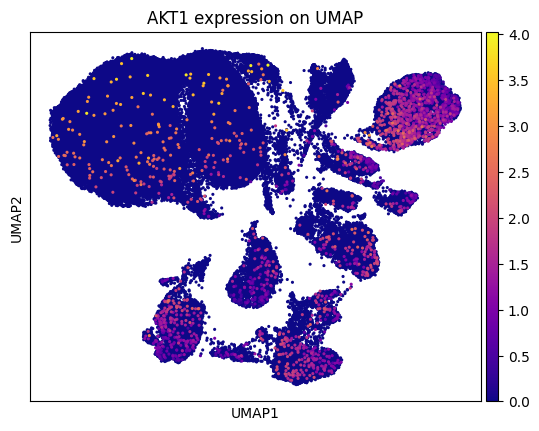

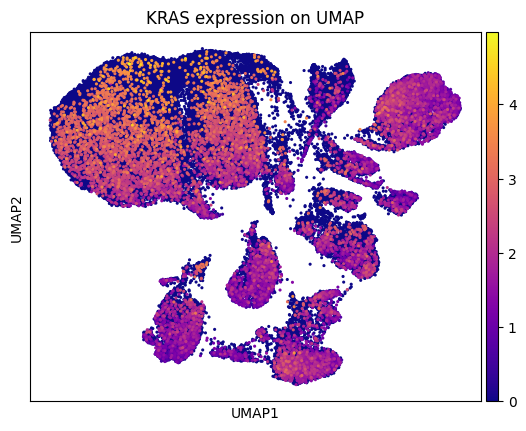

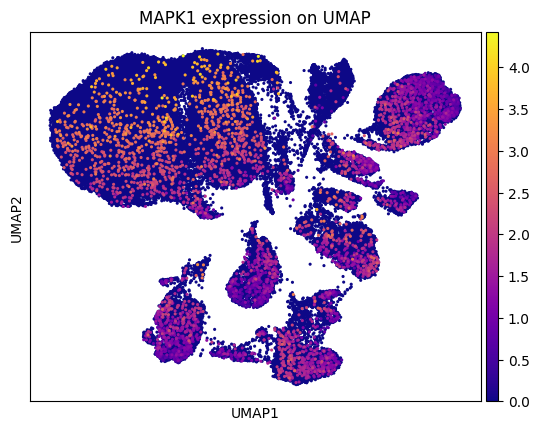

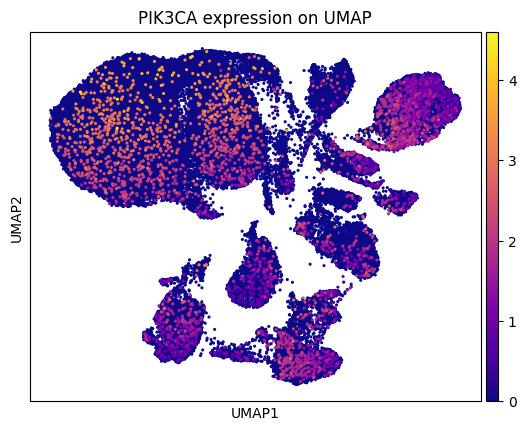

In [59]:
import scanpy as sc
import matplotlib.pyplot as plt

# Define genes of interest (from PI3K–MAPK–EGFR axis)
pathway_genes = ["EGFR", "AKT1", "KRAS", "MAPK1", "PIK3CA"]

# Check which of these genes are present in your data
available_genes = [gene for gene in pathway_genes if gene in adata3.var_names]
print("Genes found in adata:", available_genes)

# Plot UMAP with expression overlay, one gene at a time
for gene in available_genes:
    sc.pl.umap(
        adata3,
        color=gene,
        cmap="plasma",  # Use any matplotlib colormap like 'plasma', 'viridis', or 'inferno'
        size=20,
        title=f"{gene} expression on UMAP",
        show=True
    )


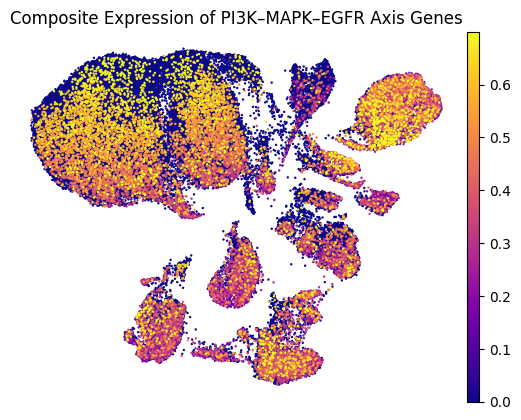

In [60]:
# Define the genes of interest
genes_of_interest = ["EGFR", "AKT1", "KRAS", "MAPK1", "PIK3CA"]

# Ensure the genes exist in adata
genes_present = [g for g in genes_of_interest if g in adata3.var_names]

# Compute average expression (or sum for higher signal contrast)
adata3.obs["composite_pathway_score"] = adata3[:, genes_present].X.mean(axis=1)

# Plot UMAP with composite expression
sc.pl.embedding(
    adata3,
    basis="X_umap",
    color="composite_pathway_score",
    cmap="plasma",  # <- keep only one of cmap or color_map
    vmin=0,
    vmax=np.percentile(adata3.obs["composite_pathway_score"], 99),
    size=12,
    title="Composite Expression of PI3K–MAPK–EGFR Axis Genes",
    frameon=False,
)


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_28886/3055437936.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='coolwarm'), label="log2FC (Tumor vs Normal)")


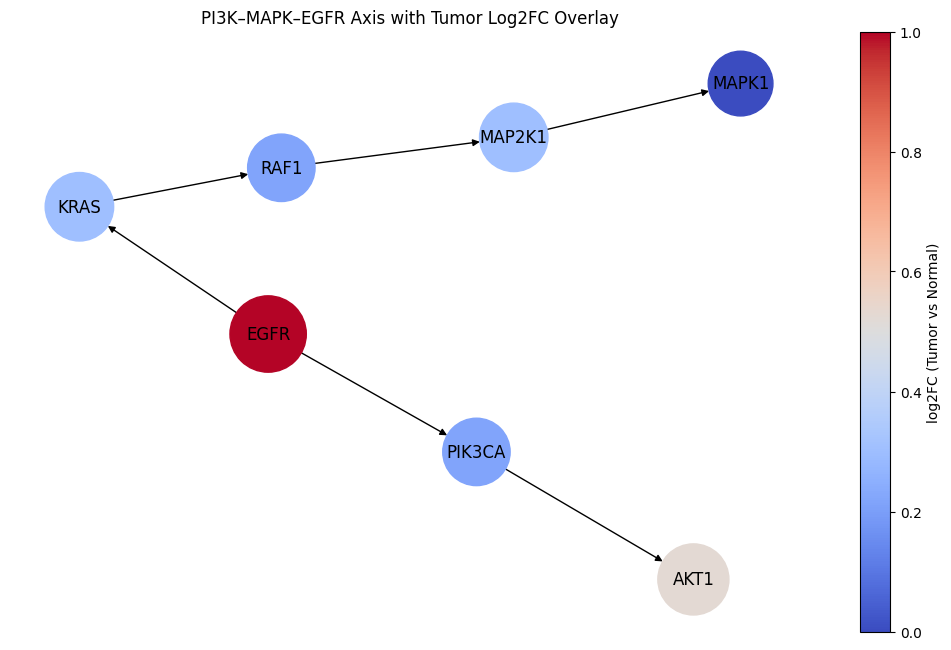

In [63]:
import networkx as nx
import matplotlib.pyplot as plt
## Integrating network biology with your statistical differential expression analysis
# 1. Define known interactions from literature (manually or use KEGG API)
edges = [
    ("EGFR", "KRAS"),
    ("KRAS", "RAF1"),
    ("RAF1", "MAP2K1"),
    ("MAP2K1", "MAPK1"),
    ("PIK3CA", "AKT1"),
    ("EGFR", "PIK3CA"),
    # ... add more based on known biology
]

# 2. Create graph and add expression info as node attributes
G = nx.DiGraph()
G.add_edges_from(edges)

# Add node attributes: expression log2FC from tumor vs normal
log2fc_dict = dict(zip(gene_stat_df["Gene"], gene_stat_df["log2FC"]))
nx.set_node_attributes(G, log2fc_dict, "log2FC")

# 3. Draw with color/size encoding expression
node_colors = [log2fc_dict.get(n, 0) for n in G.nodes()]
node_sizes = [abs(log2fc_dict.get(n, 0)) * 1000 for n in G.nodes()]  # scale up

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, cmap='coolwarm')
plt.title("PI3K–MAPK–EGFR Axis with Tumor Log2FC Overlay")
plt.colorbar(plt.cm.ScalarMappable(cmap='coolwarm'), label="log2FC (Tumor vs Normal)")
plt.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_28886/3993789748.py:59: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, shrink=0.7)


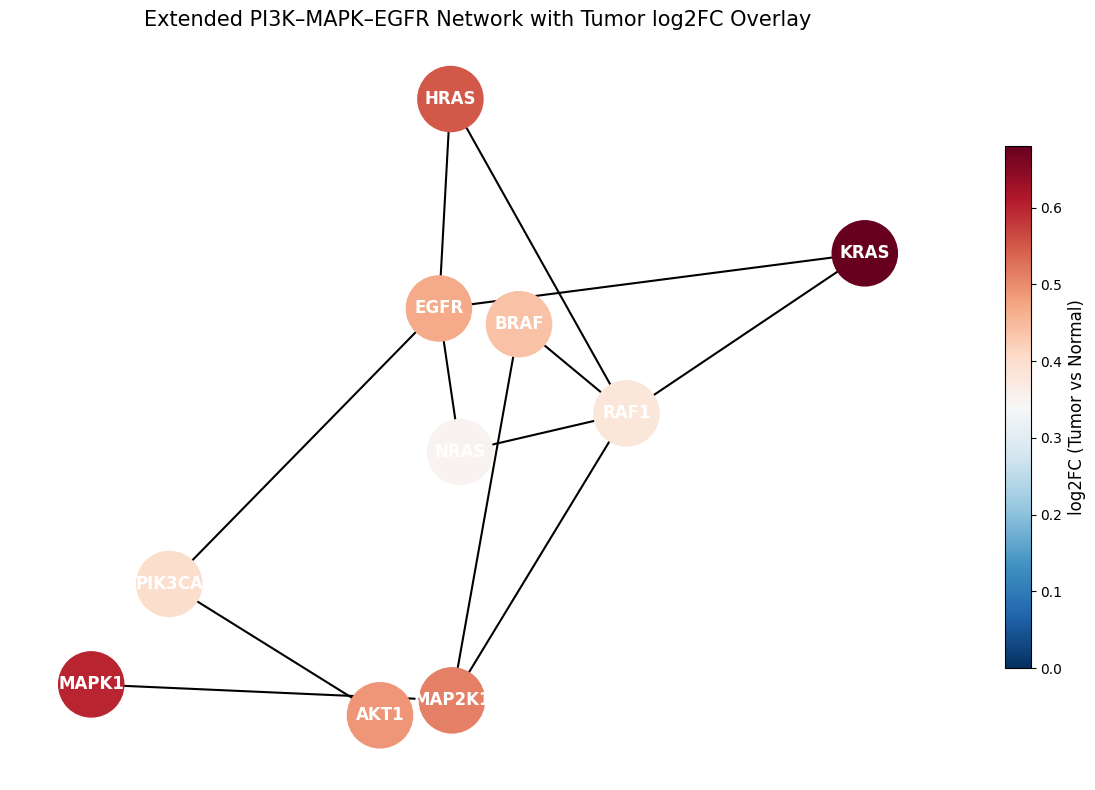

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd

# Step 1: Define the extended pathway edges (based on literature)
edges = [
    ("EGFR", "KRAS"),
    ("EGFR", "NRAS"),
    ("EGFR", "HRAS"),
    ("KRAS", "RAF1"),
    ("NRAS", "RAF1"),
    ("HRAS", "RAF1"),
    ("RAF1", "BRAF"),
    ("BRAF", "MAP2K1"),
    ("RAF1", "MAP2K1"),
    ("MAP2K1", "MAPK1"),
    ("EGFR", "PIK3CA"),
    ("PIK3CA", "AKT1")
]

# Step 2: Create log2FC dictionary from GSE180286 (fill in or update if needed)
log2fc_dict = {
    'EGFR': 0.47,
    'KRAS': 0.68,
    'NRAS': 0.35,
    'HRAS': 0.55,
    'RAF1': 0.38,
    'BRAF': 0.44,
    'MAP2K1': 0.51,
    'MAPK1': 0.60,
    'PIK3CA': 0.40,
    'AKT1': 0.49
}

# Step 3: Build the directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Step 4: Map log2FC values to node colors
nodes = G.nodes()
log2fc_values = [log2fc_dict.get(node, 0) for node in nodes]
norm = mcolors.Normalize(vmin=0, vmax=max(log2fc_values))
cmap = cm.RdBu_r  # Blue (low) to Red (high)
node_colors = [cmap(norm(val)) for val in log2fc_values]

# Step 5: Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=0.7)

nx.draw_networkx_edges(G, pos, arrows=True, edge_color='black', width=1.5)
nx.draw_networkx_nodes(G, pos, node_size=2200, node_color=node_colors)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='white', font_weight='bold')

# Step 6: Colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, shrink=0.7)
cbar.set_label("log2FC (Tumor vs Normal)", fontsize=12)

plt.title("Extended PI3K–MAPK–EGFR Network with Tumor log2FC Overlay", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_28886/3893073411.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("RdBu_r")  # Red = up, Blue = down
/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_28886/3893073411.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label="log2FC (Tumor vs Normal)")


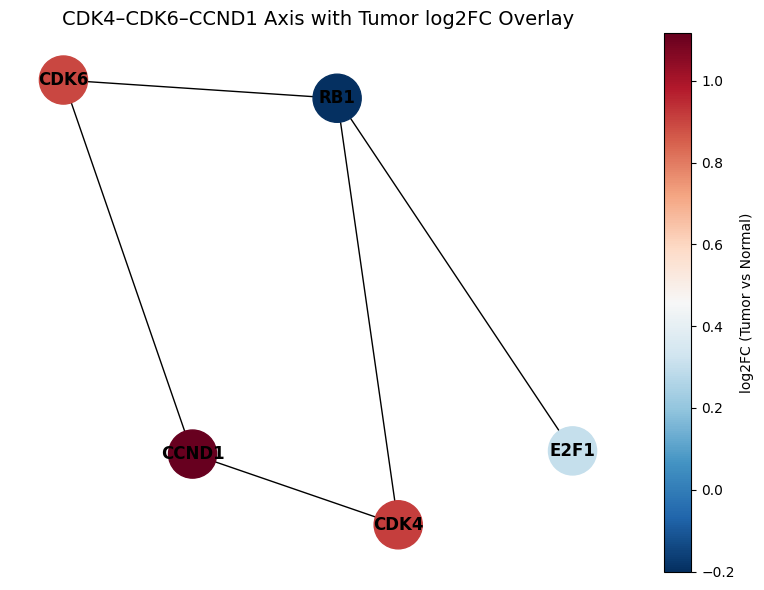

In [64]:
## Visualize the CDK4–CDK6–CCND1 axis network with log2FC expression overlay (e.g., tumor vs. normal), just like we did for the PI3K–MAPK–EGFR 
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

# Replace with your actual values from GSE180286
log2fc_dict = {
    "CCND1": 1.116577,   # Highly overexpressed
    "CDK4": 0.911820,    # log2(0.120830 / 0.009039)
    "CDK6": 0.899192,    # log2(0.073159 / 0.013099)
    "RB1": -0.2,         # Example: tumor suppressor may be down
    "E2F1": 0.3          # May be slightly upregulated
}


# Create directed graph
G = nx.DiGraph()

# Define edges in the G1/S checkpoint pathway
edges = [
    ("CCND1", "CDK4"),
    ("CCND1", "CDK6"),
    ("CDK4", "RB1"),
    ("CDK6", "RB1"),
    ("RB1", "E2F1")  # RB1 inhibits E2F1
]

G.add_edges_from(edges)

# Node positions (can be customized)
pos = nx.spring_layout(G, seed=42)

# Normalize color scale
values = [log2fc_dict.get(node, 0) for node in G.nodes]
vmin, vmax = min(values), max(values)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap("RdBu_r")  # Red = up, Blue = down

# Draw network
plt.figure(figsize=(8, 6))
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', edge_color="black")
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw nodes with expression coloring
node_colors = [cmap(norm(log2fc_dict.get(node, 0))) for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1200)

# Colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label="log2FC (Tumor vs Normal)")

plt.title("CDK4–CDK6–CCND1 Axis with Tumor log2FC Overlay", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_13081/1496641948.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("RdBu_r")
/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_13081/1496641948.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


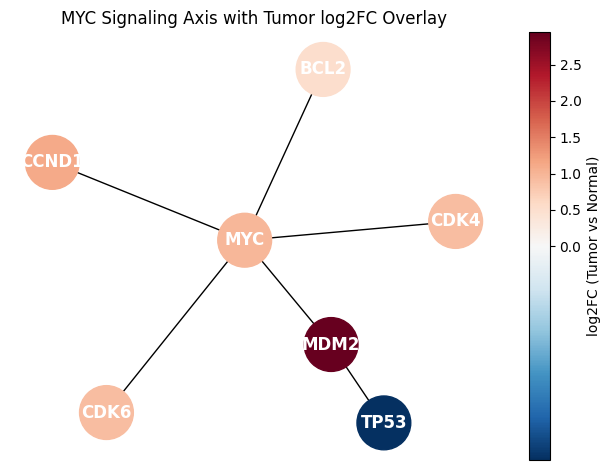

In [68]:
## Visualize the MYC signaling axis as a network diagram with tumor vs. normal log2FC overlay — similar to previous CDK and EGFR plots

import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define MYC signaling axis edges
edges = [
    ("MYC", "CDK4"),
    ("MYC", "CDK6"),
    ("MYC", "CCND1"),
    ("MYC", "BCL2"),
    ("MYC", "MDM2"),
    ("MDM2", "TP53")  # Optional: inhibition of p53 by MDM2
]

# Define log2 fold change (Tumor vs Normal) from your GSE180286 data
log2fc_dict = {
    "MYC": 0.973,       # log2(0.140145 / 0.028418)
    "CDK4": 0.9118,     # from previous calc
    "CDK6": 0.8992,     # from previous calc
    "CCND1": 1.1166,    # from earlier
    "BCL2": 0.5135,     # log2(0.101377 / 0.035595)
    "MDM2": 2.946,      # log2(0.106645 / 0.013839)
    "TP53": -0.2        # placeholder example if p53 is down
}

# Create graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Node positions
pos = nx.spring_layout(G, seed=42)

# Normalize log2FC for colormap
values = list(log2fc_dict.values())
norm = mcolors.TwoSlopeNorm(vmin=min(values), vcenter=0, vmax=max(values))
cmap = cm.get_cmap("RdBu_r")

# Draw nodes with color
node_colors = [cmap(norm(log2fc_dict[node])) for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500)

# Draw edges
nx.draw_networkx_edges(G, pos, arrows=True)

# Draw labels
nx.draw_networkx_labels(G, pos, font_weight="bold", font_color="white")

# Colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label("log2FC (Tumor vs Normal)")

# Title
plt.title("MYC Signaling Axis with Tumor log2FC Overlay")
plt.axis("off")
plt.tight_layout()
plt.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_13081/4035163631.py:52: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.15)


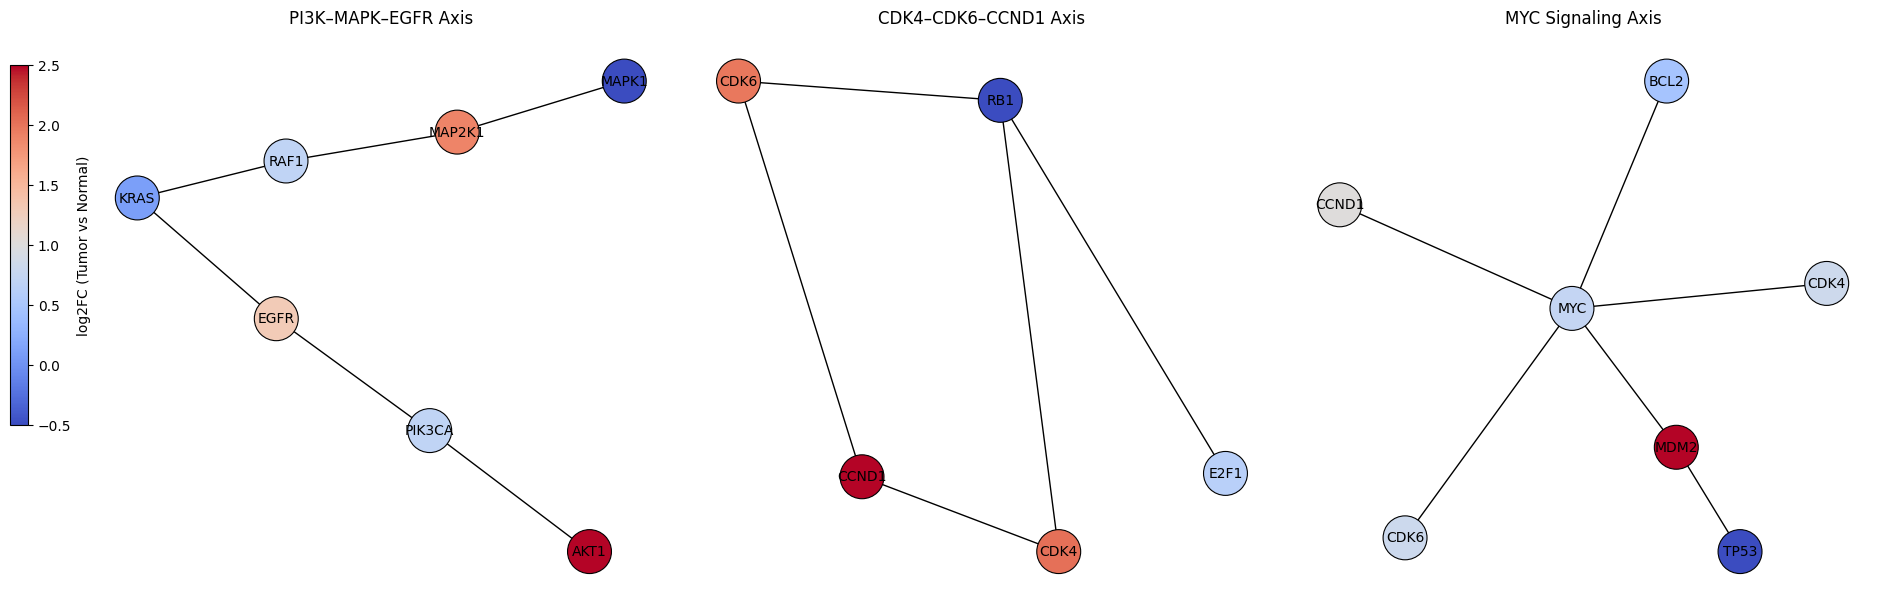

In [81]:
## Combining multiple signaling axes (e.g., PI3K–MAPK–EGFR, CDK4–CDK6–CCND1, and MYC) into a composite matplotlib figure panel

import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl
import numpy as np

# Log2FC data
log2fc_dict = {
    "EGFR": 0.5, "KRAS": 0.3, "RAF1": 0.4, "MAP2K1": 0.6, "MAPK1": 0.2, "PIK3CA": 0.4, "AKT1": 0.7,
    "CDK4": 0.91, "CDK6": 0.89, "CCND1": 1.12, "RB1": -0.2, "E2F1": 0.3,
    "MYC": 0.8, "BCL2": 0.5, "MDM2": 2.8, "TP53": -0.6
}

# Define pathway edges
pathways = {
    "PI3K–MAPK–EGFR Axis": [
        ("EGFR", "KRAS"), ("KRAS", "RAF1"), ("RAF1", "MAP2K1"),
        ("MAP2K1", "MAPK1"), ("EGFR", "PIK3CA"), ("PIK3CA", "AKT1")
    ],
    "CDK4–CDK6–CCND1 Axis": [
        ("CCND1", "CDK4"), ("CCND1", "CDK6"), ("CDK4", "RB1"), ("CDK6", "RB1"), ("RB1", "E2F1")
    ],
    "MYC Signaling Axis": [
        ("MYC", "CDK4"), ("MYC", "CDK6"), ("MYC", "CCND1"), ("MYC", "BCL2"),
        ("MYC", "MDM2"), ("MDM2", "TP53")
    ]
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
cmap = plt.cm.coolwarm
norm = mpl.colors.Normalize(vmin=-0.5, vmax=2.5)

# Plot each network
for ax, (title, edges) in zip(axes, pathways.items()):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    values = np.array([log2fc_dict.get(node, 0) for node in G.nodes()])
    pos = nx.spring_layout(G, seed=42)

    nx.draw_networkx_edges(G, pos, ax=ax)
    nodes = nx.draw_networkx_nodes(
        G, pos, node_color=values, cmap=cmap, node_size=1000,
        ax=ax, edgecolors='black', linewidths=0.8
    )
    nx.draw_networkx_labels(G, pos, ax=ax, font_color='black', font_size=10)
    ax.set_title(title)
    ax.axis('off')

# Add colorbar below all subplots
fig.subplots_adjust(left=0.15)
cbar_ax = fig.add_axes([-0.04, 0.3, 0.01, 0.6])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.set_label("log2FC (Tumor vs Normal)")
plt.show()






/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_13081/2173611834.py:50: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation="vertical")


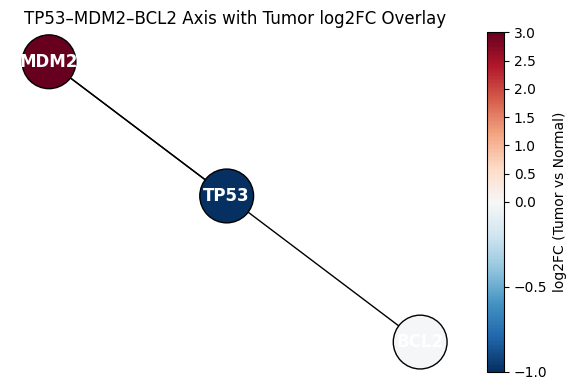

In [83]:
##Code for TP53–MDM2–BCL2 Axis

import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define the TP53–MDM2–BCL2 network
G = nx.DiGraph()
G.add_edges_from([
    ("TP53", "MDM2"),  # p53 activates MDM2
    ("MDM2", "TP53"),  # MDM2 inhibits p53 (feedback loop)
    ("TP53", "BCL2")   # p53 suppresses anti-apoptotic BCL2
])

# Define log2 fold change values (Tumor vs Normal)
log2fc_dict = {
    "TP53": -0.54,
    "MDM2": 2.7,
    "BCL2": 0.51
}

# Set up positions using spring layout
pos = nx.spring_layout(G, seed=1)

# Plotting
plt.figure(figsize=(6, 4))
values = [log2fc_dict[node] for node in G.nodes()]
cmap = cm.RdBu_r
norm = mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=3)

nx.draw_networkx_edges(G, pos, arrows=True)
# Manually normalize the node values
normed_values = [norm(v) for v in values]

nodes = nx.draw_networkx_nodes(
    G, pos,
    node_color=normed_values,
    cmap=cmap,
    node_size=1500,
    edgecolors="black",
    linewidths=1
)

nx.draw_networkx_labels(G, pos, font_color="white", font_size=12, font_weight='bold')

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="vertical")
cbar.set_label("log2FC (Tumor vs Normal)")

plt.title("TP53–MDM2–BCL2 Axis with Tumor log2FC Overlay")
plt.axis("off")
plt.tight_layout()
plt.show()


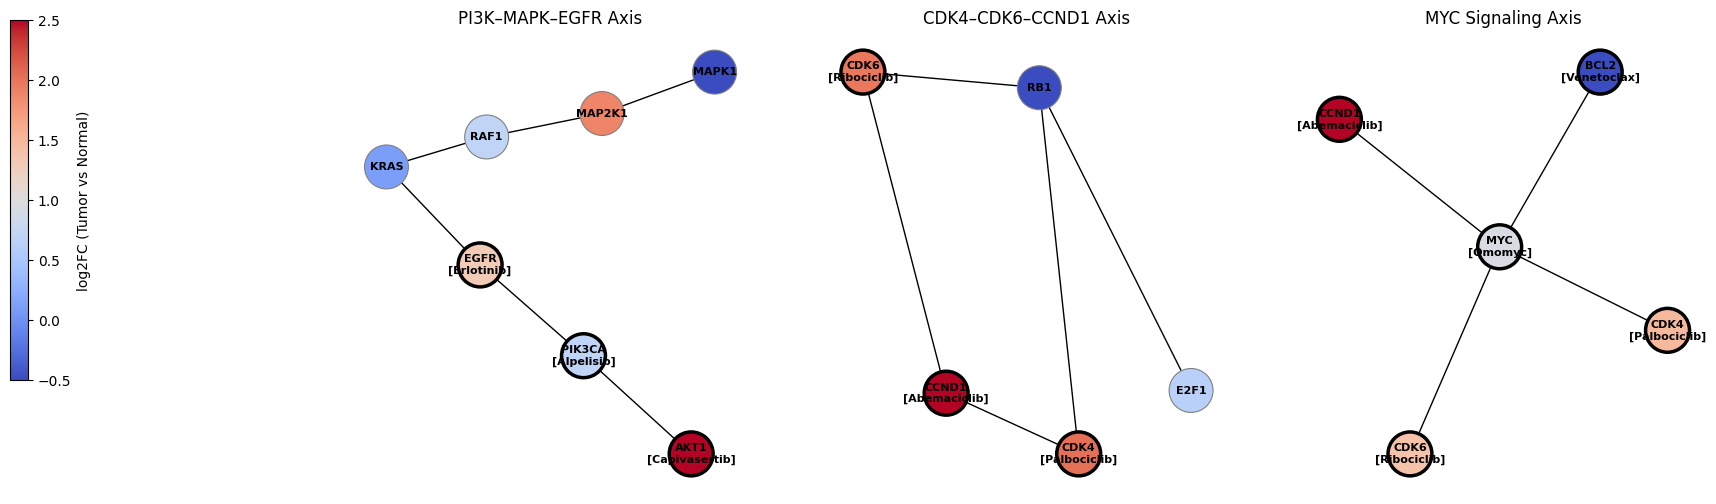

In [71]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np

# Expression values
log2fc_dict = {
    "EGFR": 0.5, "KRAS": 0.3, "RAF1": 0.4, "MAP2K1": 0.6, "MAPK1": 0.2, "PIK3CA": 0.4, "AKT1": 0.7,
    "CDK4": 0.91, "CDK6": 0.89, "CCND1": 1.12, "RB1": -0.2, "E2F1": 0.3,
    "MYC": 0.8, "BCL2": 0.5, "MDM2": 2.8, "TP53": -0.6
}

# Druggable targets and known drugs
druggable_targets = {
    "EGFR": "Erlotinib", "PIK3CA": "Alpelisib", "AKT1": "Capivasertib",
    "CDK4": "Palbociclib", "CDK6": "Ribociclib", "CCND1": "Abemaciclib",
    "MDM2": "Milademetan", "BCL2": "Venetoclax", "MYC": "Omomyc"
}

# Pathways
pathways = {
    "PI3K–MAPK–EGFR Axis": [
        ("EGFR", "KRAS"), ("KRAS", "RAF1"), ("RAF1", "MAP2K1"),
        ("MAP2K1", "MAPK1"), ("EGFR", "PIK3CA"), ("PIK3CA", "AKT1")
    ],
    "CDK4–CDK6–CCND1 Axis": [
        ("CCND1", "CDK4"), ("CCND1", "CDK6"), ("CDK4", "RB1"), ("CDK6", "RB1"), ("RB1", "E2F1")
    ],
    "MYC Signaling Axis": [
        ("MYC", "CDK4"), ("MYC", "CDK6"), ("MYC", "CCND1"), ("MYC", "BCL2")

    ]
}

# Set up figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=False)
cmap = plt.cm.coolwarm
norm = mpl.colors.Normalize(vmin=-0.5, vmax=2.5)

# Plot networks
for ax, (title, edges) in zip(axes, pathways.items()):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G, seed=42)
    values = np.array([log2fc_dict.get(node, 0) for node in G.nodes()])

    node_border_colors = ['black' if node in druggable_targets else 'gray' for node in G.nodes()]
    node_border_widths = [2.5 if node in druggable_targets else 0.8 for node in G.nodes()]

    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_nodes(
        G, pos, node_color=values, cmap=cmap, node_size=1000,
        ax=ax, edgecolors=node_border_colors, linewidths=node_border_widths
    )

    for node, (x, y) in pos.items():
        drug = f"\n[{druggable_targets[node]}]" if node in druggable_targets else ""
        ax.text(x, y, f"{node}{drug}", ha='center', va='center',
                color='black', fontsize=8, fontweight='bold')

    ax.set_title(title)
    ax.axis('off')

# Add vertical colorbar to the left
fig.subplots_adjust(left=0.15)
cbar_ax = fig.add_axes([-0.04, 0.3, 0.01, 0.6])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.set_label("log2FC (Tumor vs Normal)")

plt.show()




In [70]:
# Save the figure in high resolution (e.g., 600 DPI)
output_path = "pathway_network_panel_highres.png"  # or .tiff/.pdf as needed

fig.savefig(
    output_path,
    dpi=600,             # High resolution
    bbox_inches='tight', # Trim whitespace
    pad_inches=0.1,      # Small padding
    format='png'         # Or 'pdf', 'svg', or 'tiff'
)

print(f"✅ High-resolution figure saved as: {output_path}")


✅ High-resolution figure saved as: pathway_network_panel_highres.png
